# Análise Exploratória de Dados

## Importando Bibliotecas

In [ ]:
# Bibliotecas principais
import pandas as pd
import numpy as np

# Bibliotecas de Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Lendo o conjunto de dados usando Pandas

In [ ]:
Cities_Brazil = pd.read_excel('Cities_Brazil_IBGE.xlsx')
Cities_Brazil

IBGECode            LocalCidade LocalUF       LocalEstado RegiaoBrasil  \
0      1100015  ALTA FLORESTA D'OESTE      RO          Rondonia            N   
1      1100023              ARIQUEMES      RO          Rondonia            N   
2      1100031                 CABIXI      RO          Rondonia            N   
3      1100049                 CACOAL      RO          Rondonia            N   
4      1100056             CEREJEIRAS      RO          Rondonia            N   
...        ...                    ...     ...               ...          ...   
5565   5222005             VIANOPOLIS      GO             Goiás           CO   
5566   5222054         VICENTINOPOLIS      GO             Goiás           CO   
5567   5222203               VILA BOA      GO             Goiás           CO   
5568   5222302          VILA PROPICIO      GO             Goiás           CO   
5569   5300108               BRASILIA      DF  Distrito Federal           CO   

     Latitude Longitude         Gentilico  PopEstimada_2018  PopCenso 2010  \
0     -119283   -619953    alta-florense              23167          24392   
1     -990571   -630325      ariquemense             106168          90353   
2     -134945    -60552       cabixiense               5438           6313   
3     -114343   -614562       cacoalense              84813          78574   
4      -13187   -608168     cerejeirense              16444          17029   
...       ...       ...               ...               ...            ...   
5565  -167405   -485159      vianopolino              13746          12548   
5566  -177322   -498047  vicentinopolino               8611           7371   
5567  -150387    -47052       vilaboense               6026           4735   
5568  -154542   -488819      propiciense               5758           5145   
5569  -157795   -479297      brasiliense            2974703        2570160   

       IDHM  ReceitasRealizadas_2014  DespesasEmpenhadas_2014  Pib_2014  
0     0,641                    53490                    47577  16461,11  
1     0,702                        0                        0  19401,43  
2      0,65                    22635                    19354  18346,17  
3     0,718                   169636                   155473  20725,23  
4     0,692                    53147                    46774  22179,17  
...     ...                      ...                      ...       ...  
5565  0,712                    37777                    33220  23237,24  
5566  0,684                    26783                    23511  39480,36  
5567  0,647                    17295                    15646  18992,37  
5568  0,634                    19148                    16785  35691,39  
5569  0,824                 20665448                 19008773  73971,05  

[5570 rows x 14 columns]

## Analisando dimensão e tipo das colunas do DataFrame
### Podemos observar que as colunas "Pib_2014" e "IDHM" (Índice de Desenvolvimento Humano Municipal) estão sendo mostradas como do tipo 'object', isso ocorre por conta que os valores das casas dos milhares estão sendo separados por vírgula, como é o usual na formatação no Brasil, porém no Pyhton quando é identificado a vírgula o valor é definido como 'object' em vez de 'int64', como deveria ser, logo devemos realizar uma substituição da vírgula pelo ponto, para que os dados possam ser representados com int64.

In [ ]:
Cities_Brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   IBGECode                 5570 non-null   int64 
 1   LocalCidade              5570 non-null   object
 2   LocalUF                  5570 non-null   object
 3   LocalEstado              5570 non-null   object
 4   RegiaoBrasil             5570 non-null   object
 5   Latitude                 5570 non-null   object
 6   Longitude                5570 non-null   object
 7   Gentilico                5570 non-null   object
 8   PopEstimada_2018         5570 non-null   int64 
 9   PopCenso 2010            5570 non-null   int64 
 10  IDHM                     5564 non-null   object
 11  ReceitasRealizadas_2014  5570 non-null   int64 
 12  DespesasEmpenhadas_2014  5570 non-null   int64 
 13  Pib_2014                 5570 non-null   object
dtypes: int64(5), object(9)
memory usage: 609

### As colunas 'IDHM' e 'Pib_2014' agora são do tipo 'float64' e os valores dessas colunas agora tem pontos nos lugares das vírgulas

In [ ]:
# Definindo uma função que troca a vírgula por ponto
def replace_comma_with_dot(value):
    # Verificando se o valor é uma string e contém uma vírgula antes de substituir.
    if isinstance(value, str) and ',' in value:
        return value.replace(',', '.')
    return value

# Aplicando a função nas colunas relevantes.
Cities_Brazil['Pib_2014'] = Cities_Brazil['Pib_2014'].apply(replace_comma_with_dot)
Cities_Brazil['IDHM'] = Cities_Brazil['IDHM'].apply(replace_comma_with_dot)

# Convertendo as colunas para o tipo float.
Cities_Brazil[['Pib_2014', 'IDHM']] = Cities_Brazil[['Pib_2014', 'IDHM']].astype(float)

# Verificando as informações do DataFrame.
Cities_Brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IBGECode                 5570 non-null   int64  
 1   LocalCidade              5570 non-null   object 
 2   LocalUF                  5570 non-null   object 
 3   LocalEstado              5570 non-null   object 
 4   RegiaoBrasil             5570 non-null   object 
 5   Latitude                 5570 non-null   object 
 6   Longitude                5570 non-null   object 
 7   Gentilico                5570 non-null   object 
 8   PopEstimada_2018         5570 non-null   int64  
 9   PopCenso 2010            5570 non-null   int64  
 10  IDHM                     5564 non-null   float64
 11  ReceitasRealizadas_2014  5570 non-null   int64  
 12  DespesasEmpenhadas_2014  5570 non-null   int64  
 13  Pib_2014                 5570 non-null   float64
dtypes: float64(2), int64(5),

### Agora todas as colunas estão completas sem dados NAN

In [ ]:
# Encontrando o valor mínimo da coluna 'IDHM'
min_idhm = Cities_Brazil['IDHM'].min()

# Preenchendo os valores NaN com o valor mínimo
Cities_Brazil['IDHM'] = Cities_Brazil['IDHM'].fillna(min_idhm)
Cities_Brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IBGECode                 5570 non-null   int64  
 1   LocalCidade              5570 non-null   object 
 2   LocalUF                  5570 non-null   object 
 3   LocalEstado              5570 non-null   object 
 4   RegiaoBrasil             5570 non-null   object 
 5   Latitude                 5570 non-null   object 
 6   Longitude                5570 non-null   object 
 7   Gentilico                5570 non-null   object 
 8   PopEstimada_2018         5570 non-null   int64  
 9   PopCenso 2010            5570 non-null   int64  
 10  IDHM                     5570 non-null   float64
 11  ReceitasRealizadas_2014  5570 non-null   int64  
 12  DespesasEmpenhadas_2014  5570 non-null   int64  
 13  Pib_2014                 5570 non-null   float64
dtypes: float64(2), int64(5),

## Analisando Medidas de Têndecias Centrais

### A mediana da coluna 'PopCenso 2010' é de 10.931 mil habitantes, ou seja, 50% das cidades brasileiras tem menos de 10.931 mil habitantes no Censo Populacional de 2010.

### A média da coluna 'PopCenso 2010' é de 34.245 mil habitantes, ou seja, a média populacional das cidades brasileiras de acordo com o Censo de 2010 é de 34.245 mil habitantes.

### A grande diferença entre a média e a mediana da população em 2010 revela um cenário de alta concentração populacional em poucos municípios.

### Existe uma grande desigualdade no desenvolvimento humano entre os municípios brasileiros. Algumas cidades apresentam índices muito mais elevados do que outras. Baseados nas métricas da coluna 'IDHM'

### O alto desvio padrão do PIB per capita indica uma grande disparidade entre os municípios. Isso significa que existem municípios com um nível de renda por habitante muito elevado e outros com um nível muito baixo.

### A mediana do PIB per capita sendo significativamente menor que a média indica que a distribuição da renda é assimétrica à direita. Ou seja, a maior parte dos municípios possui um PIB per capita abaixo da média, enquanto poucos municípios concentram uma grande parcela da riqueza.

### Podemos observar que as colunas 'PopCenso 2010', 'ReceitasRealizadas_2014', 'DespesasEmpenhadas_2014', 'Pib_2014' os valores mínimos são iguais a zero, o que não reflete a realidade, por isso iremos substituir esses valores, em cada coluna, pelo valores mínimos diferentes de zero.

In [ ]:
Cities_Brazil.describe()

IBGECode  PopEstimada_2018  PopCenso 2010         IDHM  \
count  5.570000e+03      5.570000e+03   5.570000e+03  5570.000000   
mean   3.253591e+06      3.743176e+04   3.424555e+04     0.658908   
std    9.849103e+05      2.199690e+05   2.030242e+05     0.072394   
min    1.100015e+06      7.860000e+02   0.000000e+00     0.418000   
25%    2.512126e+06      5.454000e+03   5.220000e+03     0.599000   
50%    3.146280e+06      1.159050e+04   1.093150e+04     0.665000   
75%    4.119190e+06      2.529550e+04   2.340900e+04     0.718000   
max    5.300108e+06      1.217687e+07   1.125350e+07     0.862000   

       ReceitasRealizadas_2014  DespesasEmpenhadas_2014       Pib_2014  
count             5.570000e+03             5.570000e+03    5570.000000  
mean              8.922484e+04             8.367268e+04   19503.272422  
std               7.816391e+05             7.675576e+05   19629.678677  
min               0.000000e+00             0.000000e+00       0.000000  
25%               1.319300e+04             1.166525e+04    8394.507500  
50%               2.223450e+04             2.024950e+04   14663.150000  
75%               4.783175e+04             4.451850e+04   23967.745000  
max               4.335609e+07             4.344333e+07  513134.200000

## Criando a coluna 'Pib_per_capita_2014' que recebe os  valores da coluna 'Pib_2014' divididos pelos valores da coluna 'Pop Censo 2010'

### Iremos analisar o Pib per capita, porque com esse indicador econômico conseguiremos identificar uma métrica que está intrinsecamente ligada a qualidade de vida dos habitantes das cidades brasileiras.

In [ ]:
# Calculando o Pib per capita usando a coluna 'Pib_2014' e a coluna 'PopCenso 2010'
Cities_Brazil['Pib_per_capita_2014'] = Cities_Brazil.apply(lambda row: row['Pib_2014'] / row['PopCenso 2010'] if row['PopCenso 2010'] != 0 else 0, axis=1)
# Usando uma função lambda para tratamento de valores iguais a 0 na coluna 'PopCenso 2010' que serão tratados logo a seguir

### Agora temos todas as colunas sem valores nulos. Isso deve ser feito pois valores nulos influenciam diretamente nas medidas de têndencias centrais que estamos analisando, fazendo com que essas métricas sejam "puxadas" para esquerda, ou seja, acabem tendo valores menores do que os que deveriam ter.

In [ ]:
for column in ['PopCenso 2010', 'ReceitasRealizadas_2014', 'DespesasEmpenhadas_2014', 'Pib_2014', 'Pib_per_capita_2014']:
    # Encontrando o menor valor diferente de zero na coluna
    min_value = Cities_Brazil[Cities_Brazil[column] != 0][column].min()

    # Substituindo os zeros pelo menor valor encontrado
    Cities_Brazil[column] = Cities_Brazil[column].replace(0, min_value)

Cities_Brazil.describe()

IBGECode  PopEstimada_2018  PopCenso 2010         IDHM  \
count  5.570000e+03      5.570000e+03   5.570000e+03  5570.000000   
mean   3.253591e+06      3.743176e+04   3.424642e+04     0.658908   
std    9.849103e+05      2.199690e+05   2.030241e+05     0.072394   
min    1.100015e+06      7.860000e+02   8.050000e+02     0.418000   
25%    2.512126e+06      5.454000e+03   5.220000e+03     0.599000   
50%    3.146280e+06      1.159050e+04   1.093150e+04     0.665000   
75%    4.119190e+06      2.529550e+04   2.340900e+04     0.718000   
max    5.300108e+06      1.217687e+07   1.125350e+07     0.862000   

       ReceitasRealizadas_2014  DespesasEmpenhadas_2014       Pib_2014  \
count             5.570000e+03             5.570000e+03    5570.000000   
mean              8.927975e+04             8.425798e+04   19503.877411   
std               7.816329e+05             7.674949e+05   19629.129397   
min               3.240000e+02             3.498000e+03    3369.790000   
25%               1.319300e+04             1.166525e+04    8394.507500   
50%               2.223450e+04             2.024950e+04   14663.150000   
75%               4.783175e+04             4.451850e+04   23967.745000   
max               4.335609e+07             4.344333e+07  513134.200000   

       Pib_per_capita_2014  
count          5570.000000  
mean              2.668518  
std               4.526647  
min               0.004830  
25%               0.491279  
50%               1.211025  
75%               2.939866  
max             106.657540

## Usando a função "Series" para criar uma Series do pandas com os dados de todas as regiões brasileiras

In [ ]:
Regions = pd.Series(Cities_Brazil['RegiaoBrasil'].unique())
Regions

0      N
1     NE
2     SE
3    SUL
4     CO
dtype: object

## Utilizando a função "drop" para excluir as colunas que não são numéricas e o IBGECode depois agrupando os dados por região

### A coluna 'IDHM' se refere ao Índice de Desenvolvimento Humano Municipal, por isso ela não será usada no DataFrame 'Data_Regions', pois os dados deste DataFrame são referentes as regiões do Brasil, por isso iremos calcular o 'IDH' para cada região brasileira

In [ ]:
Data_Regions = Cities_Brazil.drop(['IBGECode', 'LocalCidade', 'LocalEstado', 'LocalUF', 'Latitude', 'Longitude', 'Gentilico'], axis = 1)

# Analisaremos primeiramente os dados macro associados as regiões brasileiras, por isso criamos um DataFrame com as colunas do DataFrame original agrupadas pelos valores da
# coluna 'RegiaoBrasil' e depois somamos os valores das linhas para cada coluna
Data_Regions = Data_Regions.groupby(['RegiaoBrasil']).sum()

# Resetando index do DataFrame para utilização da coluna "RegiaoBrasil"
Data_Regions.reset_index(inplace = True)
Data_Regions

RegiaoBrasil  PopEstimada_2018  PopCenso 2010      IDHM  \
0           CO          16085885       14058899   321.710   
1            N          18182253       15865259   273.388   
2           NE          56760780       53074687  1059.493   
3           SE          87711946       80364410  1165.906   
4          SUL          29754036       27389306   849.620   

   ReceitasRealizadas_2014  DespesasEmpenhadas_2014     Pib_2014  \
0                 47295573                 43926942  12929926.89   
1                 29238461                 27868730   6188382.66   
2                103402145                 99899924  17399705.59   
3                236371858                227187530  37863176.72   
4                 80980175                 70433848  34255405.32   

   Pib_per_capita_2014  
0          1943.788340  
1           789.373069  
2          1644.508119  
3          4323.763892  
4          6162.210574

## Agrupando por região e calculando a soma do IDHM e a contagem de cidades

### Agora temos o IDH para cada região brasileira

### Vamos analisar cada coluna deste DataFrame associando as Regiôes do Brasil aos valores associadas a elas

In [ ]:
region_data = Cities_Brazil.groupby('RegiaoBrasil').agg({'IDHM': 'sum', 'LocalCidade': 'count'})

# Renomeando a coluna 'LocalCidade' para 'city_count'
region_data.rename(columns={'LocalCidade': 'city_count'}, inplace=True)

# Resetando o índice para acessar a coluna 'RegiaoBrasil'
region_data = region_data.reset_index()

# Calculando o IDH para cada região
region_data['IDH'] = region_data['IDHM'] / region_data['city_count']

# Mesclando com o DataFrame Data_Regions para adicionar a coluna 'IDH'
Data_Regions = pd.merge(Data_Regions, region_data[['RegiaoBrasil', 'IDH']], on='RegiaoBrasil', how='left')

Data_Regions = Data_Regions.drop('IDHM', axis=1)

# Exibindo o DataFrame Data_Regions com a nova coluna 'IDH'
Data_Regions

RegiaoBrasil  PopEstimada_2018  PopCenso 2010  ReceitasRealizadas_2014  \
0           CO          16085885       14058899                 47295573   
1            N          18182253       15865259                 29238461   
2           NE          56760780       53074687                103402145   
3           SE          87711946       80364410                236371858   
4          SUL          29754036       27389306                 80980175   

   DespesasEmpenhadas_2014     Pib_2014  Pib_per_capita_2014       IDH  
0                 43926942  12929926.89          1943.788340  0.688887  
1                 27868730   6188382.66           789.373069  0.607529  
2                 99899924  17399705.59          1644.508119  0.590576  
3                227187530  37863176.72          4323.763892  0.698984  
4                 70433848  34255405.32          6162.210574  0.713367

### Criando uma lista com o nome completo das regiões e atribuindo a variável "new_labels"

In [ ]:
new_labels = ['Centro-Oeste', 'Norte', 'Nordeste', 'Sudeste', 'Sul']

### Podemos observar que a maior concentração populacional se encontra na região Sudeste e em segundo lugar no Nordeste de acordo com os dados da coluna 'PopCenso 2010'

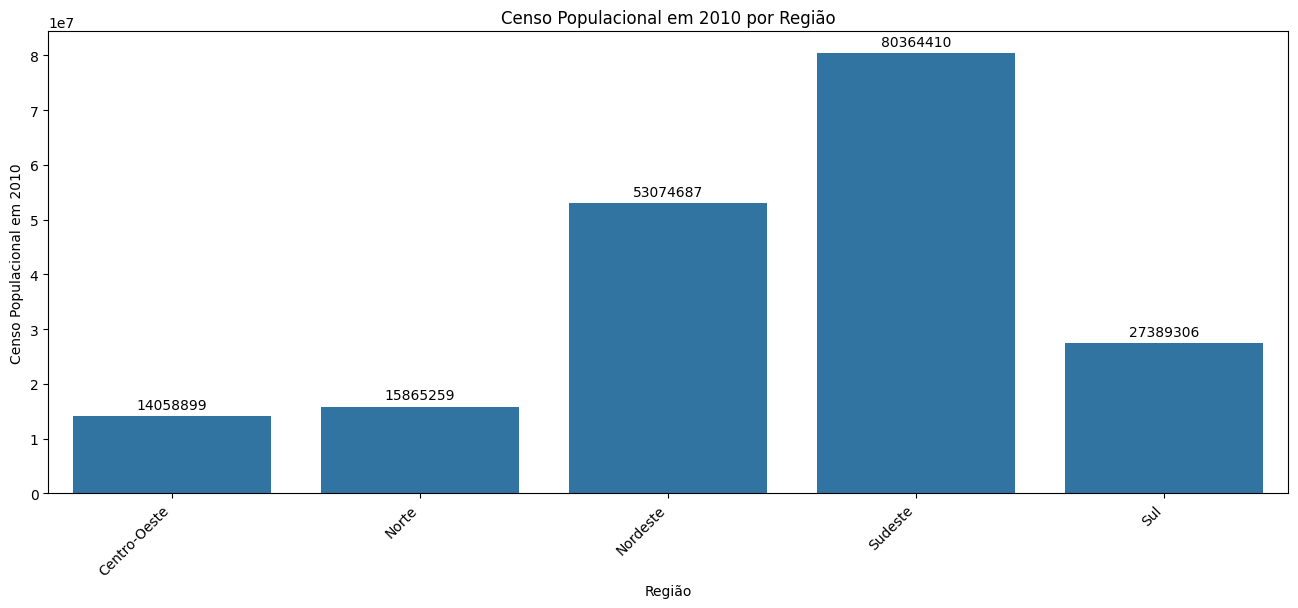

In [ ]:
# Define o tamanho do gráfico
plt.figure(figsize=(16, 6))

# Define os dados para o gráfico e atribui o gráfico a variável ax
ax = sns.barplot(x='RegiaoBrasil', y='PopCenso 2010', data=Data_Regions)

# Define o título do gráfico
plt.title('Censo Populacional em 2010 por Região')

# Define o rótulo do eixo x
plt.xlabel('Região')

# Define o rótulo do eixo y
plt.ylabel('Censo Populacional em 2010')

# Mudando os valores do eixo x
plt.xticks(ticks=plt.xticks()[0], labels=new_labels, rotation=45, ha='right')

# Adicionando os rótulos das barras
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3) # Define o formato dos rótulos e o espaçamento entre eles e as barras

# Exibe o gráfico
plt.show()

### Podemos observar que as concentrações populacionais para a População Estimada em 2018 se mantém praticamente na mesma ordem com relação ao gráfico da coluna 'PopCenso 2010' com a maior sendo no Sudeste e a segunda maior no Nordeste

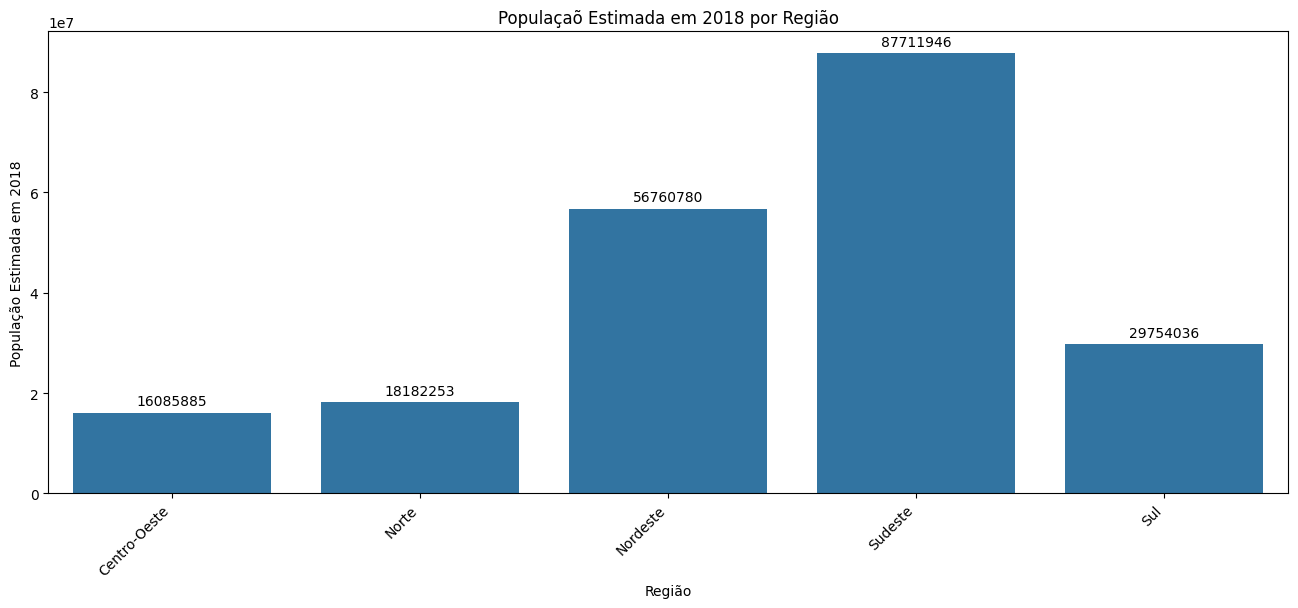

In [ ]:
# Define o tamanho do gráfico
plt.figure(figsize=(16, 6))

# Define os dados para o gráfico e atribui o gráfico a variável ax
ax = sns.barplot(x='RegiaoBrasil', y='PopEstimada_2018', data=Data_Regions)

# Define o título do gráfico
plt.title('Populaçaõ Estimada em 2018 por Região')

# Define o rótulo do eixo x
plt.xlabel('Região')

# Define o rótulo do eixo y
plt.ylabel('População Estimada em 2018')

# Mudando os valores do eixo x
plt.xticks(ticks=plt.xticks()[0], labels=new_labels, rotation=45, ha='right')

# Adicionando os rótulos das barras
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3) # Define o formato dos rótulos e o espaçamento entre eles e as barras

# Exibe o gráfico
plt.show()

## Iremos adicionar a coluna 'Crescimento Populacional Esperado' para constatar se o crescimento entre os anos de 2010 e 2018 se mantém na mesma ordem que os valores do Censo populacional de 2010 e da População Estimada em 2018

In [ ]:
# Calculando o "Crescimento Populacional Esperado" subtraindo a coluna "PopEstimada_2018" e "PopCenso_2010"
Data_Regions['Crescimento Populacional Esperado'] = (Data_Regions['PopEstimada_2018'] - Data_Regions['PopCenso 2010'])
Data_Regions

RegiaoBrasil  PopEstimada_2018  PopCenso 2010  ReceitasRealizadas_2014  \
0           CO          16085885       14058899                 47295573   
1            N          18182253       15865259                 29238461   
2           NE          56760780       53074687                103402145   
3           SE          87711946       80364410                236371858   
4          SUL          29754036       27389306                 80980175   

   DespesasEmpenhadas_2014     Pib_2014  Pib_per_capita_2014       IDH  \
0                 43926942  12929926.89          1943.788340  0.688887   
1                 27868730   6188382.66           789.373069  0.607529   
2                 99899924  17399705.59          1644.508119  0.590576   
3                227187530  37863176.72          4323.763892  0.698984   
4                 70433848  34255405.32          6162.210574  0.713367   

   Crescimento Populacional Esperado  
0                            2026986  
1                            2316994  
2                            3686093  
3                            7347536  
4                            2364730

### Como podemos ver o Crescimento Populacional se mostra muito semelhante ao Censo Populacional de 2010 e a estimativa populacional de 2018 apresenta a Região Sudeste como tendo o maior crescimento populacional dentre todas as outras. Algo curioso é que a diferença entre o crescimento populacional entre as regiôes Centro-Oeste, Norte e Sul tem valores bem menos expressivos se comparadas as diferenças do valores dessas regiôes em relação ao Censo Populacional de 2010 e a Estimativa Populacional de 2018, o que indica que as populações tiveram um crescimento bruto populacional semelhante de 2010 para 2018

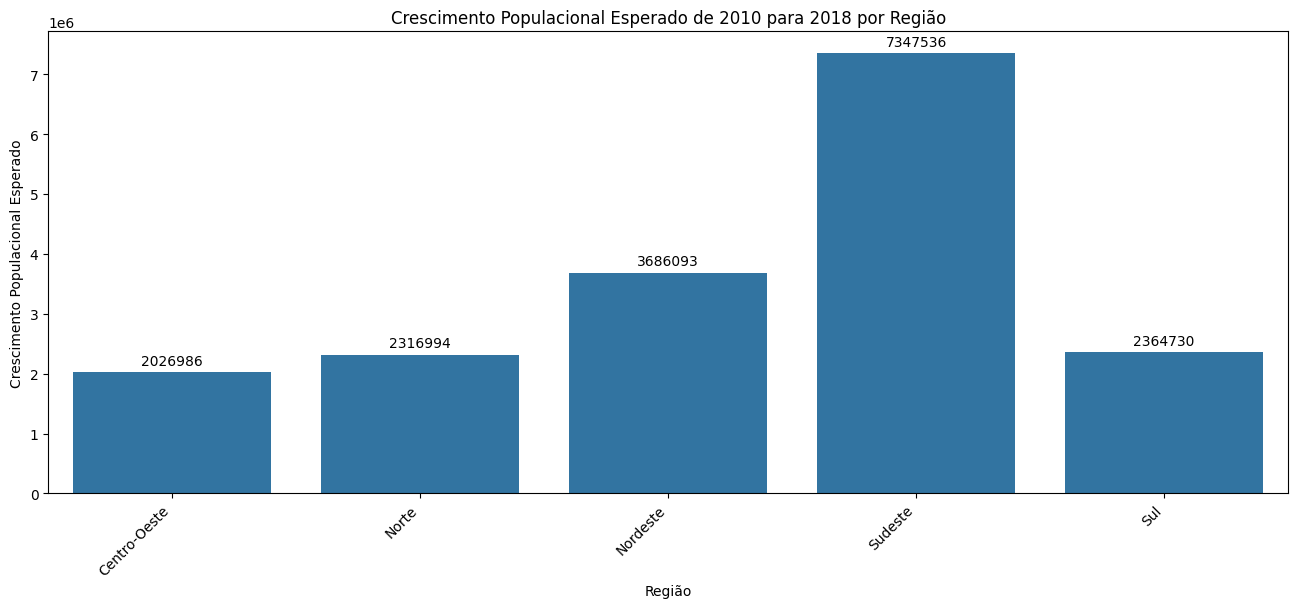

In [ ]:
# Define o tamanho do gráfico
plt.figure(figsize=(16, 6))

# Define os dados para o gráfico e atribui o gráfico a variável ax
ax = sns.barplot(x='RegiaoBrasil', y='Crescimento Populacional Esperado', data=Data_Regions)

# Define o título do gráfico
plt.title('Crescimento Populacional Esperado de 2010 para 2018 por Região')

# Define o rótulo do eixo x
plt.xlabel('Região')

# Define o rótulo do eixo y
plt.ylabel('Crescimento Populacional Esperado')

# Mudando os valores do eixo x
plt.xticks(ticks=plt.xticks()[0], labels=new_labels, rotation=45, ha='right')

# Adicionando os rótulos das barras
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3) # Define o formato dos rótulos e o espaçamento entre eles e as barras

# Exibe o gráfico
plt.show()

### Podemos observar que a Região com as maiores Receitas com uma diferença bastante considerável foi a Sudeste, o que significa que foi a Região com maior arrecadação dentre todas elas, algo que pode estar associado a quantidade de habitantes dessa Região que é a maior de todas, como vimos nos gráficos anteriores.

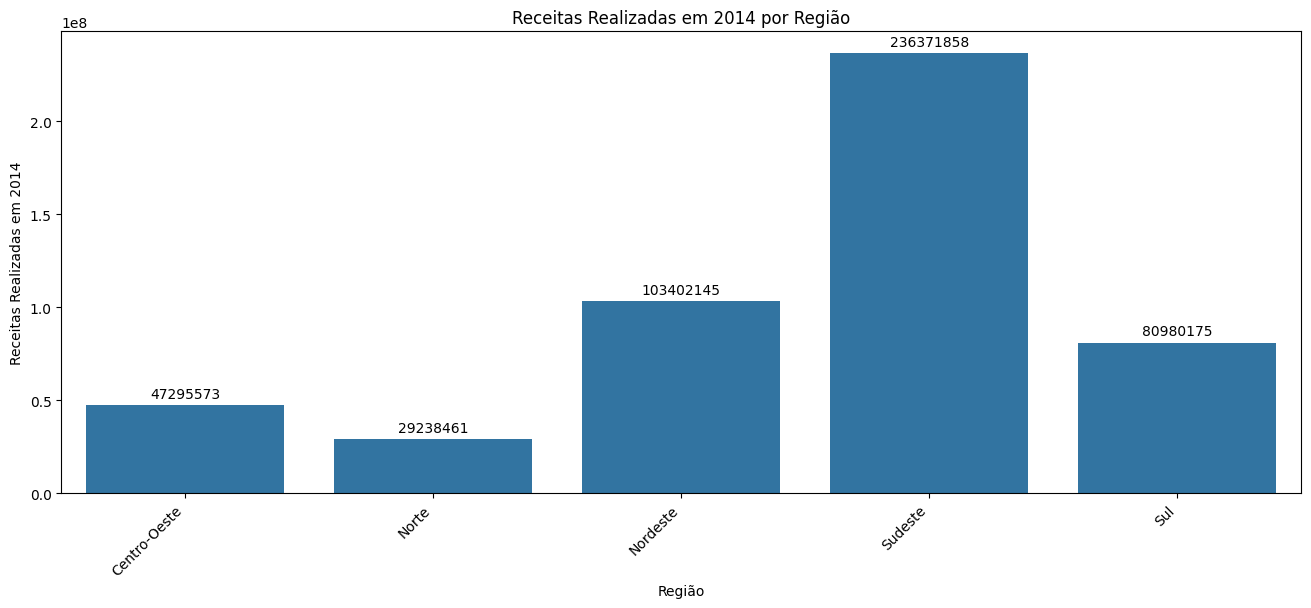

In [ ]:
# Define o tamanho do gráfico
plt.figure(figsize=(16, 6))

# Define os dados para o gráfico e atribui o gráfico a variável ax
ax = sns.barplot(x='RegiaoBrasil', y='ReceitasRealizadas_2014', data=Data_Regions)

# Define o título do gráfico
plt.title('Receitas Realizadas em 2014 por Região')

# Define o rótulo do eixo x
plt.xlabel('Região')

# Define o rótulo do eixo y
plt.ylabel('Receitas Realizadas em 2014')

# Mudando os valores do eixo x
plt.xticks(ticks=plt.xticks()[0], labels=new_labels, rotation=45, ha='right')

# Adicionando os rótulos das barras
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3) # Define o formato dos rótulos e o espaçamento entre eles e as barras

# Exibe o gráfico
plt.show()

### Analisando agora o gráfico das Receitas Realizadas, ele e o gráfico das Despesas Empenhadas exibem a mesma ordem de magnitude em relação as Regiões Brasileiras, isso indica que as Regiões que tem maiores Receitas estão também tendo maiores gastos, então isso mostra aproveitamento proporcional entre as Regiôes. No entanto, se observamos o gráfico do Censo Populacional de 2010 e o de Estimativa Populacional de 2018 vemos que a população Norte tem uma quantidade maior de habitantes que a Regiâo Centro-Oeste, a seguir veremos que essa diferença impacta diretamente o Pib e o Pib per capita.

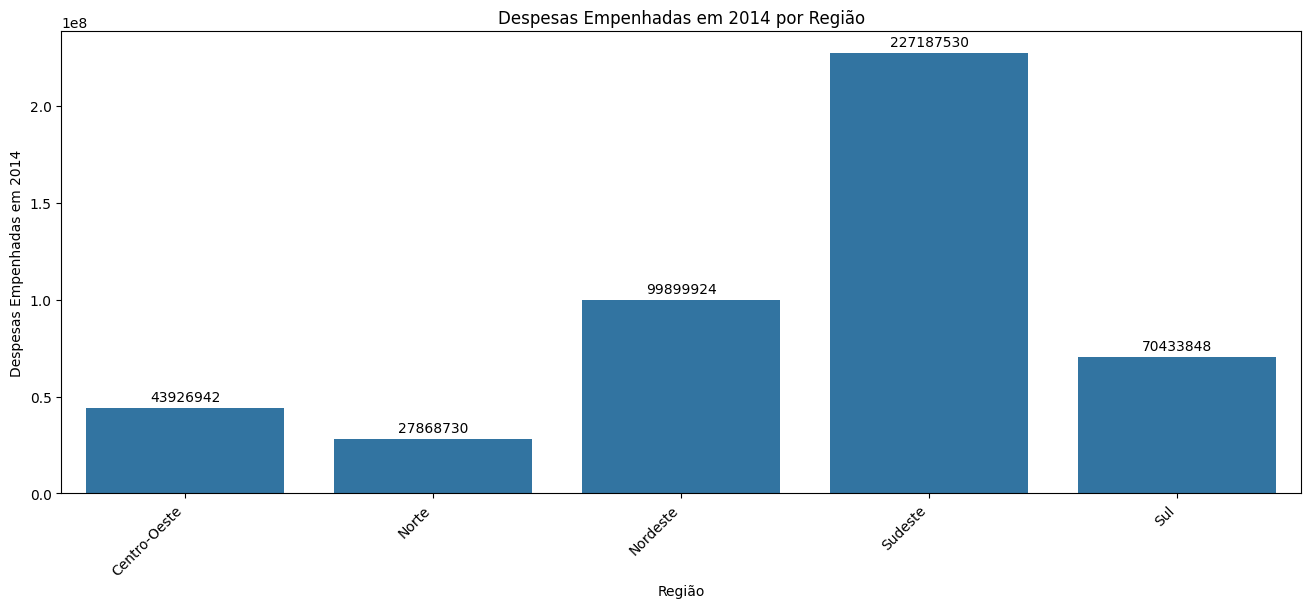

In [ ]:
# Define o tamanho do gráfico
plt.figure(figsize=(16, 6))

# Define os dados para o gráfico e atribui o gráfico a variável ax
ax = sns.barplot(x='RegiaoBrasil', y='DespesasEmpenhadas_2014', data=Data_Regions)

# Define o título do gráfico
plt.title('Despesas Empenhadas em 2014 por Região')

# Define o rótulo do eixo x
plt.xlabel('Região')

# Define o rótulo do eixo y
plt.ylabel('Despesas Empenhadas em 2014')

# Mudando os valores do eixo x
plt.xticks(ticks=plt.xticks()[0], labels=new_labels, rotation=45, ha='right')

# Adicionando os rótulos das barras
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3) # Define o formato dos rótulos e o espaçamento entre eles e as barras

# Exibe o gráfico
plt.show()

### A Região Sudeste segue com os maiores indicadores econômicos tambem no Pib em 2014.Vemos algo notável aqui, a Região Sul ultrapassa a Região Nordeste quando o assunto é o Pib em 2014, isso quer dizer que a robustez e saúde econômica da Região Sul é maior que a da Região Nordeste e comparando com as Receitas Realizadas vemos que a Região Nordeste tem valores maiores nesse quesito que a Região Sul que é um indicador de quanto há de captação de recursos. Com isso, podemos concluir que a Região Nordeste tem uma captação de recursos maior que a Região Sul, porém tem valores monetários de bens e serviços menores que a Região Sul.

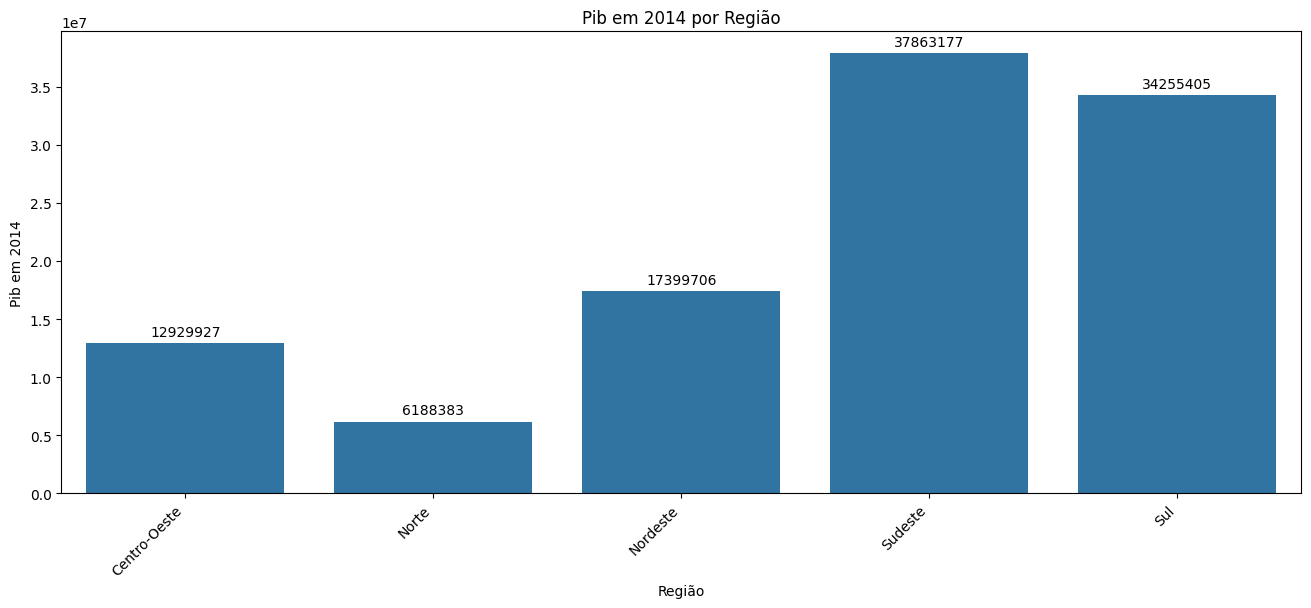

In [ ]:
# Define o tamanho do gráfico
plt.figure(figsize=(16, 6))

# Define os dados para o gráfico e atribui o gráfico a variável ax
ax = sns.barplot(x='RegiaoBrasil', y='Pib_2014', data=Data_Regions)

# Define o título do gráfico
plt.title('Pib em 2014 por Região')

# Define o rótulo do eixo x
plt.xlabel('Região')

# Define o rótulo do eixo y
plt.ylabel('Pib em 2014')

# Mudando os valores do eixo x
plt.xticks(ticks=plt.xticks()[0], labels=new_labels, rotation=45, ha='right')

# Adicionando os rótulos das barras
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3) # Define o formato dos rótulos e o espaçamento entre eles e as barras

# Exibe o gráfico
plt.show()

### Aqui podemos constatar aglo interessante, a Região Sudeste apresenta o maior Pib dentre as Regiões do Brasil, porém o Pib per capita é menor que o da Região Sul, iso significa que a Região Sudeste tem uma concentração de Renda maior em poucos habitantes e Região Sul essa renda está melhor distribuída.

### O que pode ser visto tambem em relação as Regiões Nordeste e Centro Oeste, o Nordeste apresenta um Pib maior que a Região Centro-Oeste, porém um Pib per Capita menor, então a Região Nordeste tem uma concentração de Renda maior em poucos habitantes e na região Centro-Oeste a renda é melhor distribuída.

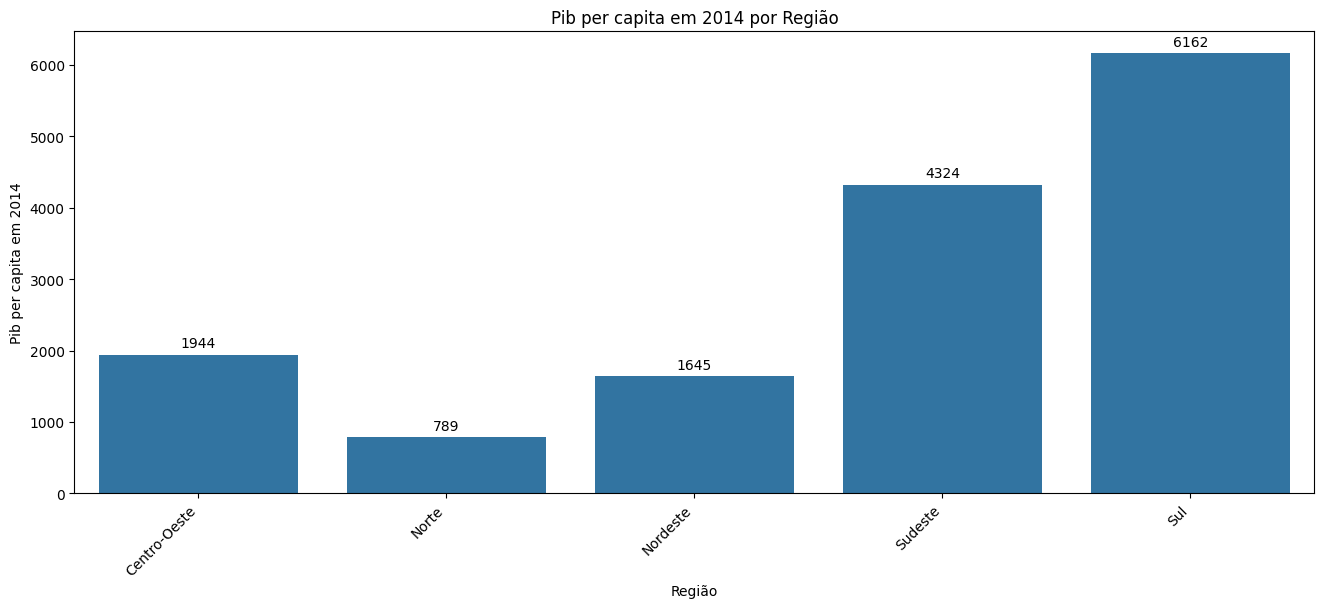

In [ ]:
# Define o tamanho do gráfico
plt.figure(figsize=(16, 6))

# Define os dados para o gráfico e atribui o gráfico a variável ax
ax = sns.barplot(x='RegiaoBrasil', y='Pib_per_capita_2014', data=Data_Regions)

# Define o título do gráfico
plt.title('Pib per capita em 2014 por Região')

# Define o rótulo do eixo x
plt.xlabel('Região')

# Define o rótulo do eixo y
plt.ylabel('Pib per capita em 2014')

# Mudando os valores do eixo x
plt.xticks(ticks=plt.xticks()[0], labels=new_labels, rotation=45, ha='right')

# Adicionando os rótulos das barras
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3) # Define o formato dos rótulos e o espaçamento entre eles e as barras

# Exibe o gráfico
plt.show()

### Como vimos anteriormente, A Região Sul é a que tem o maior Pib per capita em 2014 e isso se reflete tambem no IDH desta região, ou seja, a Região Sul tem a maior produção de bens e serviços por pessoa e tambem tem a maior qualidade de vida de todas as Regiões.

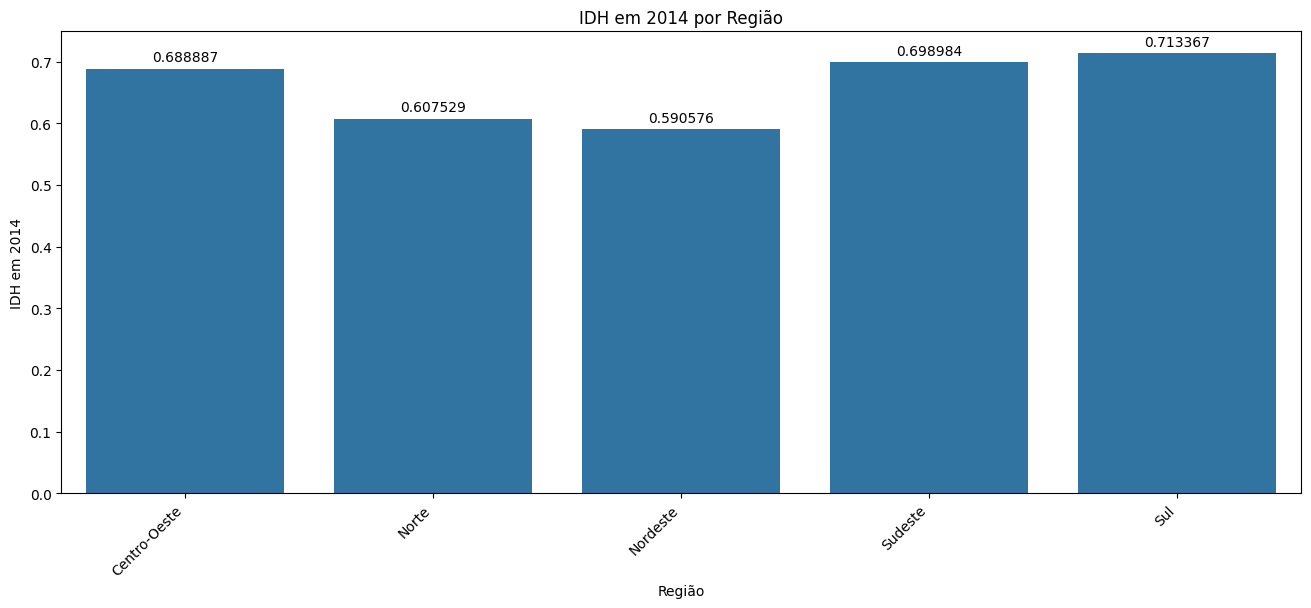

In [ ]:
# Define o tamanho do gráfico
plt.figure(figsize=(16, 6))

# Define os dados para o gráfico e atribui o gráfico a variável ax
ax = sns.barplot(x='RegiaoBrasil', y='IDH', data=Data_Regions)

# Define o título do gráfico
plt.title('IDH em 2014 por Região')

# Define o rótulo do eixo x
plt.xlabel('Região')

# Define o rótulo do eixo y
plt.ylabel('IDH em 2014')

# Mudando os valores do eixo x
plt.xticks(ticks=plt.xticks()[0], labels=new_labels, rotation=45, ha='right')

# Adicionando os rótulos das barras
ax.bar_label(ax.containers[0], padding=3) # Define o formato dos rótulos e o espaçamento entre eles e as barras

# Exibe o gráfico
plt.show()

## Usando a função "Series" para criar uma Series do pandas com os dados de todos os estados brasileiros

### Agora iremos analisar as colunas em relação a cada estado brasileiro

In [ ]:
States = pd.Series(Cities_Brazil['LocalUF'].unique())
States

0     RO
1     AC
2     AM
3     RR
4     PA
5     AP
6     TO
7     MA
8     PI
9     CE
10    RN
11    PB
12    PE
13    AL
14    SE
15    BA
16    MG
17    ES
18    RJ
19    SP
20    PR
21    SC
22    RS
23    MS
24    MT
25    GO
26    DF
dtype: object

### Utilizando a função "drop" para excluir as colunas que não são numéricas e o IBGECode depois agrupamos os dados por estado

In [ ]:
Data_States = Cities_Brazil.drop(['IBGECode', 'LocalCidade', 'LocalEstado', 'RegiaoBrasil', 'Latitude', 'Longitude', 'Gentilico'], axis = 1)
Data_States = Data_States.groupby(['LocalUF']).sum()
Data_States

PopEstimada_2018  PopCenso 2010     IDHM  ReceitasRealizadas_2014  \
LocalUF                                                                      
AC                 869265         733559   12.894                   534978   
AL                3322820        3120494   57.477                  4372262   
AM                4080611        3483985   35.037                  7600956   
AP                 829494         669526   10.285                   829678   
BA               14812617       14016906  247.658                 26367235   
CE                9075649        8452381  113.460                 18127205   
DF                2974703        2570160    0.824                 20665448   
ES                3972388        3514952   53.991                  8310534   
GO                6921161        6003788  170.966                 14180130   
MA                7035055        6574789  125.032                 11599698   
MG               21040662       19597330  569.700                 45893820   
MS                2748023        2449829   53.435                  7326217   
MT                3441998        3035122   96.485                  5123778   
PA                8513497        7581856   83.579                 12391043   
PB                3996496        3766528  131.047                  7647142   
PE                9496294        8796448  110.306                 17497954   
PI                3264531        3111097  127.731                  6373052   
PR               11348937       10444526  280.082                 28785923   
RJ               17159960       15989929   65.220                 41399620   
RN                3479010        3168027  102.012                  6415064   
RO                1757589        1562409   33.490                  3544245   
RR                 576568         450479    9.153                  1120942   
RS               11329605       10694734  354.329                 33416167   
SC                7075494        6250046  215.209                 18778085   
SE                2278308        2068017   44.770                  5002533   
SP               45538936       41262199  476.995                140767884   
TO                1555229        1383445   88.950                  3216619   

         DespesasEmpenhadas_2014     Pib_2014  Pib_per_capita_2014  
LocalUF                                                             
AC                        567658    282553.74            21.081408  
AL                       5111317    981995.54            77.960267  
AM                       6945589    599524.09            28.289010  
AP                        716691    252950.94            28.932266  
BA                      25172794   4474734.10           264.843718  
CE                      17060426   1623648.10            79.689096  
DF                      19008773     73971.05             0.028781  
ES                       7546460   2153272.17           133.068572  
GO                      13369282   5890373.85          1063.906865  
MA                      11484113   1777354.80           128.591504  
MG                      43427061  13998220.97          1934.873616  
MS                       6927927   2565402.83           234.265125  
MT                       4620960   4400179.16           645.587570  
PA                      12387507   1781551.91            76.175228  
PB                       7185380   1973471.29           312.001940  
PE                      16739410   1878618.63            96.341725  
PI                       6090764   1797919.55           293.325814  
PR                      25578886  10397427.81          1384.666254  
RJ                      42853602   3149245.75           109.601201  
RN                       6385954   1885913.03           291.906314  
RO                       3162951    877627.33            86.164693  
RR                       1169469    231710.80            19.924806  
RS                      28106295  15372248.13          3390.636306  
SC                   

### Resetando index do DatFrame para utilização da coluna "LocalUF"

In [ ]:
Data_States.reset_index(inplace = True)
Data_States

LocalUF  PopEstimada_2018  PopCenso 2010     IDHM  ReceitasRealizadas_2014  \
0       AC            869265         733559   12.894                   534978   
1       AL           3322820        3120494   57.477                  4372262   
2       AM           4080611        3483985   35.037                  7600956   
3       AP            829494         669526   10.285                   829678   
4       BA          14812617       14016906  247.658                 26367235   
5       CE           9075649        8452381  113.460                 18127205   
6       DF           2974703        2570160    0.824                 20665448   
7       ES           3972388        3514952   53.991                  8310534   
8       GO           6921161        6003788  170.966                 14180130   
9       MA           7035055        6574789  125.032                 11599698   
10      MG          21040662       19597330  569.700                 45893820   
11      MS           2748023        2449829   53.435                  7326217   
12      MT           3441998        3035122   96.485                  5123778   
13      PA           8513497        7581856   83.579                 12391043   
14      PB           3996496        3766528  131.047                  7647142   
15      PE           9496294        8796448  110.306                 17497954   
16      PI           3264531        3111097  127.731                  6373052   
17      PR          11348937       10444526  280.082                 28785923   
18      RJ          17159960       15989929   65.220                 41399620   
19      RN           3479010        3168027  102.012                  6415064   
20      RO           1757589        1562409   33.490                  3544245   
21      RR            576568         450479    9.153                  1120942   
22      RS          11329605       10694734  354.329                 33416167   
23      SC           7075494        6250046  215.209                 18778085   
24      SE           2278308        2068017   44.770                  5002533   
25      SP          45538936       41262199  476.995                140767884   
26      TO           1555229        1383445   88.950                  3216619   

    DespesasEmpenhadas_2014     Pib_2014  Pib_per_capita_2014  
0                    567658    282553.74            21.081408  
1                   5111317    981995.54            77.960267  
2                   6945589    599524.09            28.289010  
3                    716691    252950.94            28.932266  
4                  25172794   4474734.10           264.843718  
5                  17060426   1623648.10            79.689096  
6                  19008773     73971.05             0.028781  
7                   7546460   2153272.17           133.068572  
8                  13369282   5890373.85          1063.906865  
9                  11484113   1777354.80           128.591504  
10                 43427061  13998220.97          1934.873616  
11                  6927927   2565402.83           234.265125  
12                  4620960   4400179.16           645.587570  
13                 12387507   1781551.91            76.175228  
14                  7185380   1973471.29           312.001940  
15                 16739410   1878618.63            96.341725  
16                  6090764   1797919.55           293.325814  
17                 25578886  10397427.81          1384.666254  
18                 42853602   3149245.75           109.601201  
19                  6385954   1885913.03           291.906314  
20                  3162951    877627.33            86.164693  
21                  1169469    231710.80            19.924806  
22                 28106295  15372248.13          3390.636306  
23                 16748667   8485729.38          1386.908014  
24                  4669766   1006050.55            99.847741  
25                133360407  18562437.83          2146.220503  
26    

## Agrupando por região e calculando a soma do IDHM e a contagem de cidades

### Agora temos o IDH para cada estado brasileiro

### Vamos analisar cada coluna deste DataFrame associando os estados do Brasil aos valores associadas a eles

In [ ]:
state_data = Cities_Brazil.groupby('LocalUF').agg({'IDHM': 'sum', 'LocalCidade': 'count'})

# Renomeando a coluna 'LocalCidade' para 'city_count'
state_data.rename(columns={'LocalCidade': 'city_count'}, inplace=True)

# Resetando o índice para acessar a coluna 'LocalUF'
state_data = state_data.reset_index()

# Calculando o IDH para cada estado
state_data['IDH'] = state_data['IDHM'] / state_data['city_count']

# Mesclando com o DataFrame Data_States para adicionar a coluna 'IDH'
Data_States = pd.merge(Data_States, state_data[['LocalUF', 'IDH']], on='LocalUF', how='left')

Data_States = Data_States.drop('IDHM', axis=1)

# Exibindo o DataFrame Data_States com a nova coluna 'IDH'
Data_States

LocalUF  PopEstimada_2018  PopCenso 2010  ReceitasRealizadas_2014  \
0       AC            869265         733559                   534978   
1       AL           3322820        3120494                  4372262   
2       AM           4080611        3483985                  7600956   
3       AP            829494         669526                   829678   
4       BA          14812617       14016906                 26367235   
5       CE           9075649        8452381                 18127205   
6       DF           2974703        2570160                 20665448   
7       ES           3972388        3514952                  8310534   
8       GO           6921161        6003788                 14180130   
9       MA           7035055        6574789                 11599698   
10      MG          21040662       19597330                 45893820   
11      MS           2748023        2449829                  7326217   
12      MT           3441998        3035122                  5123778   
13      PA           8513497        7581856                 12391043   
14      PB           3996496        3766528                  7647142   
15      PE           9496294        8796448                 17497954   
16      PI           3264531        3111097                  6373052   
17      PR          11348937       10444526                 28785923   
18      RJ          17159960       15989929                 41399620   
19      RN           3479010        3168027                  6415064   
20      RO           1757589        1562409                  3544245   
21      RR            576568         450479                  1120942   
22      RS          11329605       10694734                 33416167   
23      SC           7075494        6250046                 18778085   
24      SE           2278308        2068017                  5002533   
25      SP          45538936       41262199                140767884   
26      TO           1555229        1383445                  3216619   

    DespesasEmpenhadas_2014     Pib_2014  Pib_per_capita_2014       IDH  
0                    567658    282553.74            21.081408  0.586091  
1                   5111317    981995.54            77.960267  0.563500  
2                   6945589    599524.09            28.289010  0.565113  
3                    716691    252950.94            28.932266  0.642813  
4                  25172794   4474734.10           264.843718  0.593904  
5                  17060426   1623648.10            79.689096  0.616630  
6                  19008773     73971.05             0.028781  0.824000  
7                   7546460   2153272.17           133.068572  0.692192  
8                  13369282   5890373.85          1063.906865  0.694984  
9                  11484113   1777354.80           128.591504  0.576184  
10                 43427061  13998220.97          1934.873616  0.667878  
11                  6927927   2565402.83           234.265125  0.676392  
12                  4620960   4400179.16           645.587570  0.684291  
13                 12387507   1781551.91            76.175228  0.580410  
14                  7185380   1973471.29           312.001940  0.587655  
15                 16739410   1878618.63            96.341725  0.596249  
16                  6090764   1797919.55           293.325814  0.570228  
17                 25578886  10397427.81          1384.666254  0.701960  
18                 42853602   3149245.75           109.601201  0.708913  
19                  6385954   1885913.03           291.906314  0.610850  
20                  3162951    877627.33            86.164693  0.644038  
21                  1169469    231710.80            19.924806  0.610200  
22                 28106295  15372248.13          3390.636306  0.712936  
23                 16748667   8485729.38          1386.908014  0.729522  
24                  4669766   1006050.55            99.847741  0.596933  
25                133360407  18562437.83          2146.220503 

### Podemos observar uma concentração mutio discrepante no estado de São Paulo em relação aos outros, com esse estado tendo uma população 4 vezes maior do que a população do Rio Grande do Sul. Também podemos ver que Minas Gerais é o segundo estado mais populoso do Brasil, com sua pouplação sendo o dobro da população de Pernambuco.

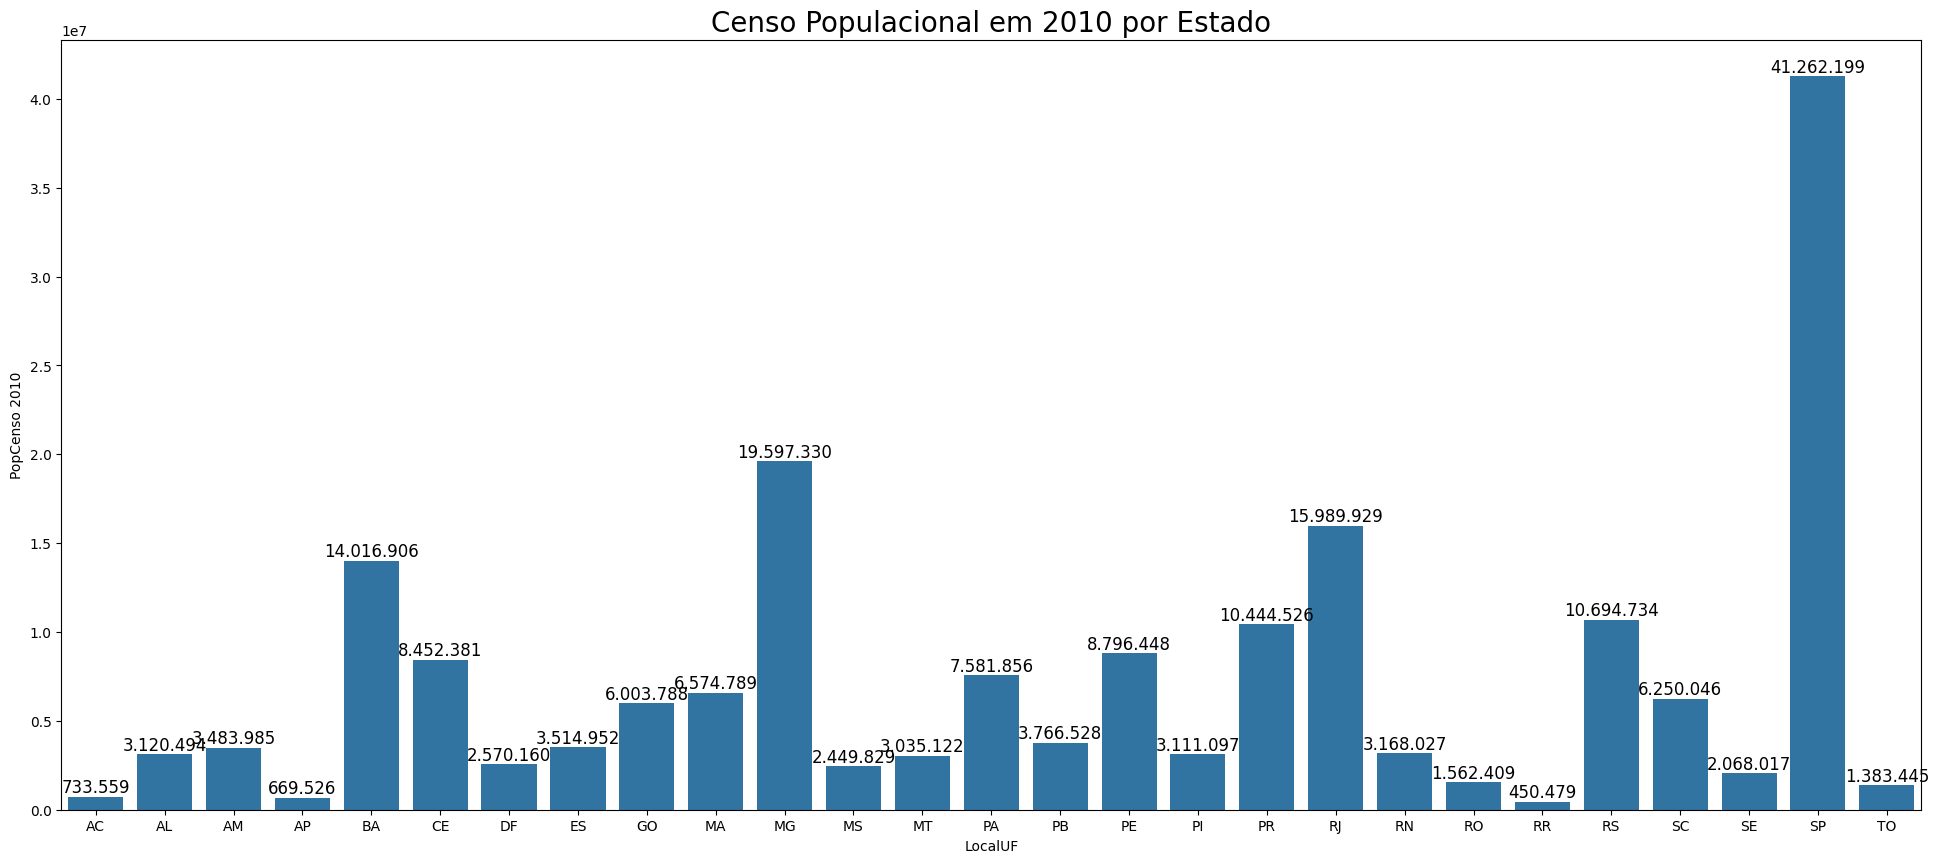

In [ ]:
# Definindo o tamanho do gráfico como '24, 10' (24 é o comprimento e 10 a altura)
plt.figure(figsize=(24, 10))

# Atribuindo o gráfico a variável "ax" e o plotando o com os parâmetros
# Dataset, x = "LocalUF" e  y = "PopCenso 2010"
ax = sns.barplot(Data_States, x="LocalUF", y="PopCenso 2010")

# Definindo os rótulos atribuidos as barras do gráfico, formatando-os para que a
# cada 3 casas seja adicionado um ponto
ax.bar_label(ax.containers[0], fmt='{:,.0f}'.format, labels=[f'{x:,.0f}'.replace(',', '.') for x in ax.containers[0].datavalues], fontsize=12)

# Adicionando título ao gráfico e definindo o tamanho da fonte como 20
ax.set_title("Censo Populacional em 2010 por Estado", fontsize=20)

# Exibindo o gráfico
plt.show()

### Observamos que a ordem de magnitude das populações se mantem, ou seja, os estados que já eram bastante populosos continuam sendo os mais populosos e os estados pouco populosos continuam com uma população bem pequena.

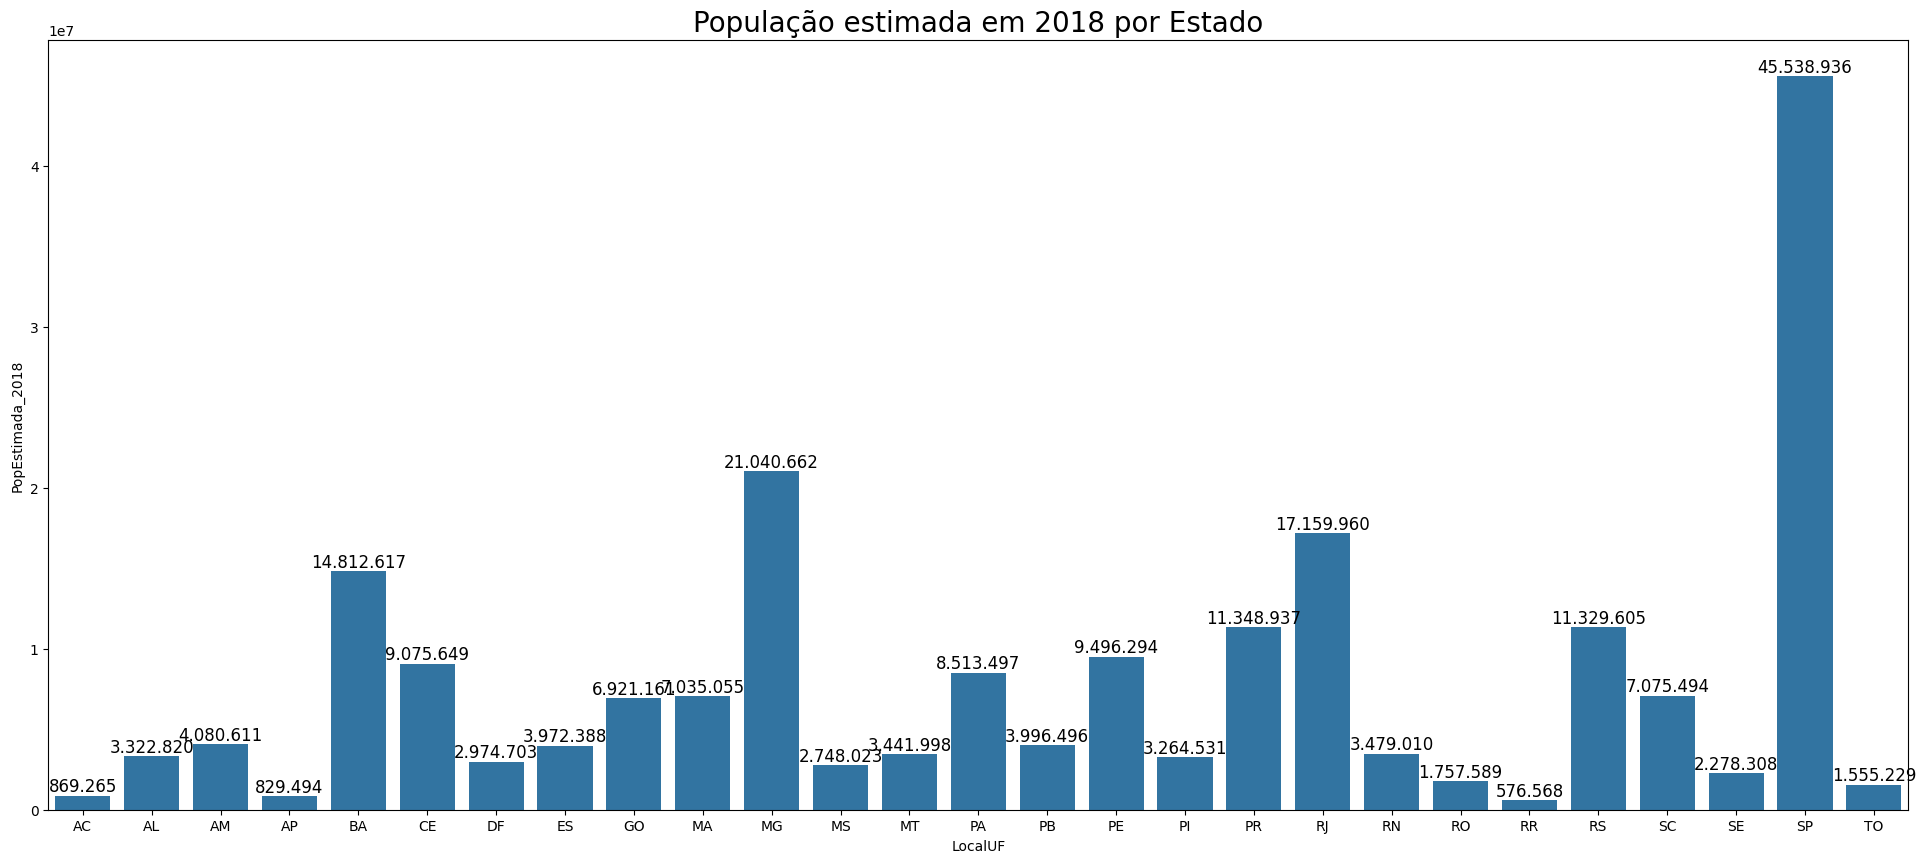

In [ ]:
# Definindo o tamanho do gráfico como '24, 10' (24 é o comprimento e 10 a altura)
plt.figure(figsize=(24, 10))

# Atribuindo o gráfico a variável "ax" e o plotando o com os parâmetros Dataset, x = "LocalUF" e  y = "PopEstimada_2018"
ax = sns.barplot(Data_States, x="LocalUF", y="PopEstimada_2018")

# Definindo os rótulos atribuidos as barras do gráfico, formatando-os para que a cada 3 casas seja adicionado um ponto
ax.bar_label(ax.containers[0], fmt='{:,.0f}'.format, labels=[f'{x:,.0f}'.replace(',', '.') for x in ax.containers[0].datavalues], fontsize=12)

# Adicionando título ao gráfico e definindo o tamanho da fonte como 20
ax.set_title("População estimada em 2018 por Estado", fontsize=20)

# Exibindo o gráfico
plt.show()

## Calculando o "Crescimento Populacional Esperado" subtraindo a coluna "PopEstimada_2018" e "PopCenso_2010"

In [ ]:
Data_States['Crescimento Populacional Esperado'] = (Data_States['PopEstimada_2018'] - Data_States['PopCenso 2010'])
Data_States.head(10)

LocalUF  PopEstimada_2018  PopCenso 2010  ReceitasRealizadas_2014  \
0      AC            869265         733559                   534978   
1      AL           3322820        3120494                  4372262   
2      AM           4080611        3483985                  7600956   
3      AP            829494         669526                   829678   
4      BA          14812617       14016906                 26367235   
5      CE           9075649        8452381                 18127205   
6      DF           2974703        2570160                 20665448   
7      ES           3972388        3514952                  8310534   
8      GO           6921161        6003788                 14180130   
9      MA           7035055        6574789                 11599698   

   DespesasEmpenhadas_2014    Pib_2014  Pib_per_capita_2014       IDH  \
0                   567658   282553.74            21.081408  0.586091   
1                  5111317   981995.54            77.960267  0.563500   
2                  6945589   599524.09            28.289010  0.565113   
3                   716691   252950.94            28.932266  0.642813   
4                 25172794  4474734.10           264.843718  0.593904   
5                 17060426  1623648.10            79.689096  0.616630   
6                 19008773    73971.05             0.028781  0.824000   
7                  7546460  2153272.17           133.068572  0.692192   
8                 13369282  5890373.85          1063.906865  0.694984   
9                 11484113  1777354.80           128.591504  0.576184   

   Crescimento Populacional Esperado  
0                             135706  
1                             202326  
2                             596626  
3                             159968  
4                             795711  
5                             623268  
6                             404543  
7                             457436  
8                             917373  
9                             460266

### Com os dados dos crescimentos populacionais de 2010 para 2018 iremos plotar um gráfico com os 10 maiores crescimentos desse período

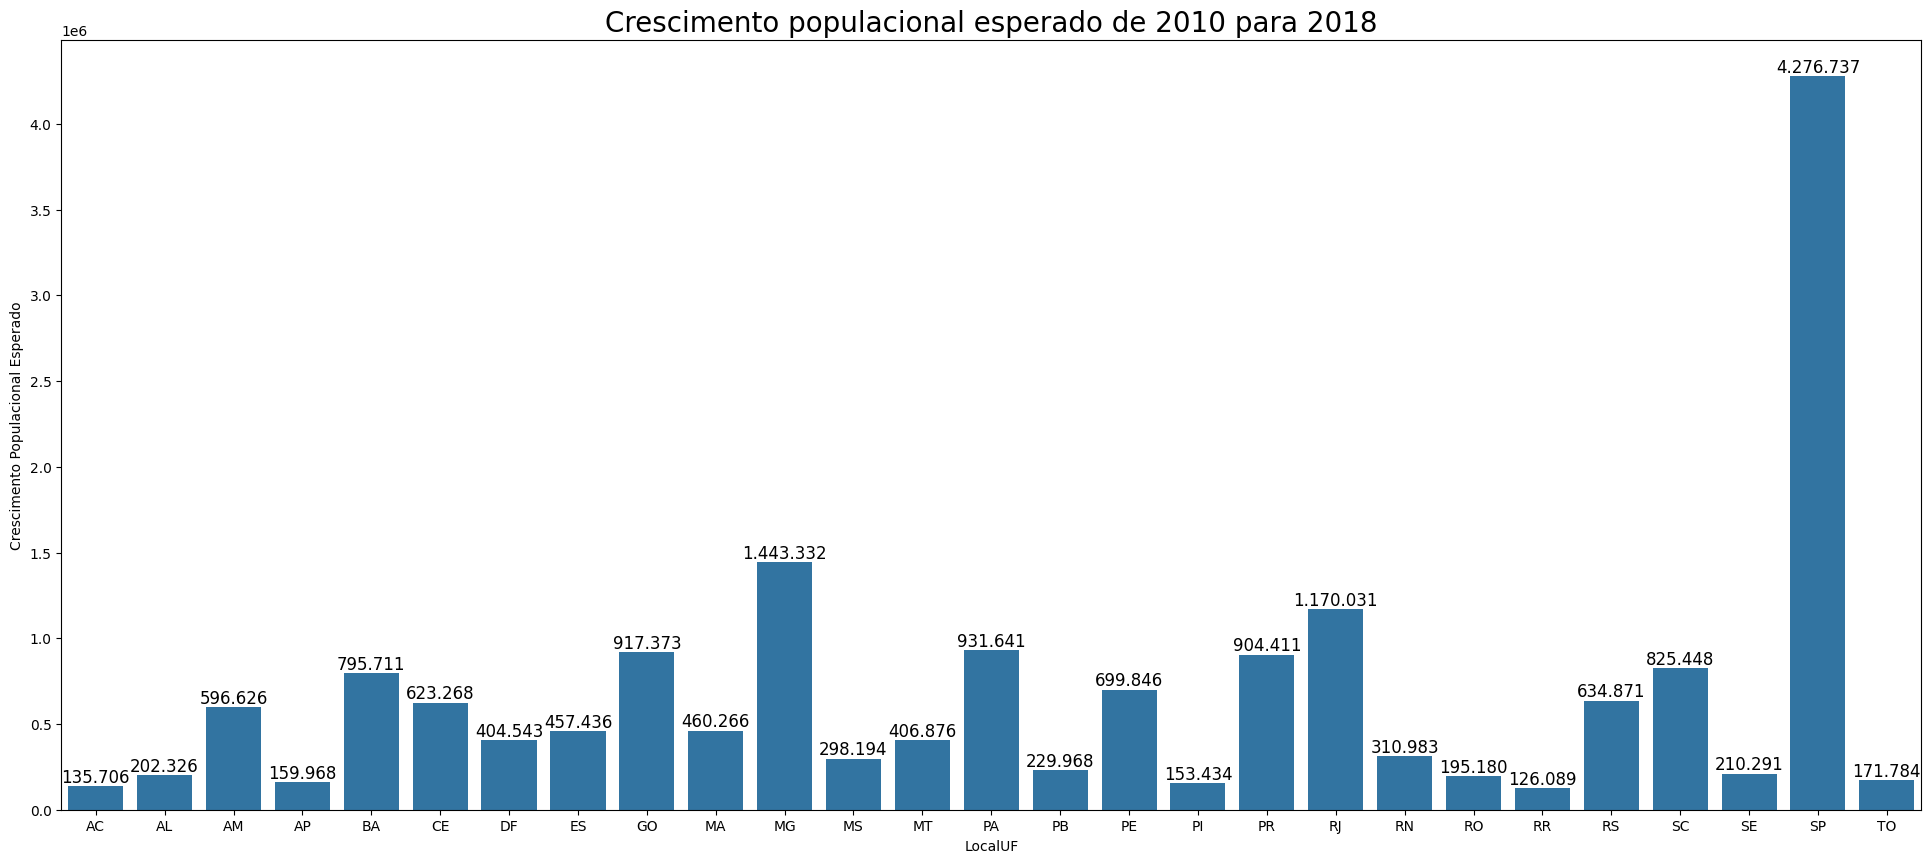

In [ ]:
# Definindo o tamanho do gráfico como '24, 10' (24 é o comprimento e 10 a altura)
plt.figure(figsize=(24, 10))

# Atribuindo o gráfico a variável "ax" e o plotando o com os parâmetros Dataset, x = "LocalUF" e  y = "Crescimento Populacional Esperado"
ax = sns.barplot(Data_States, x="LocalUF", y="Crescimento Populacional Esperado")

# Definindo os rótulos atribuidos as barras do gráfico, formatando-os para que a cada 3 casas seja adicionado um ponto
ax.bar_label(ax.containers[0], fmt='{:,.0f}'.format, labels=[f'{x:,.0f}'.replace(',', '.') for x in ax.containers[0].datavalues], fontsize=12)

# Adicionando título ao gráfico e definindo o tamanho da fonte como 20
ax.set_title("Crescimento populacional esperado de 2010 para 2018", fontsize=20)

# Exibindo o gráfico
plt.show()

### A região Sudeste tem os 3 maiores crescimentos populacionais estimado de 2010 para 2018, isso indica uma alta concentração populacional e pode indicar uma grande concentração de Receitas (essa afirmação será confirmada a seguir)

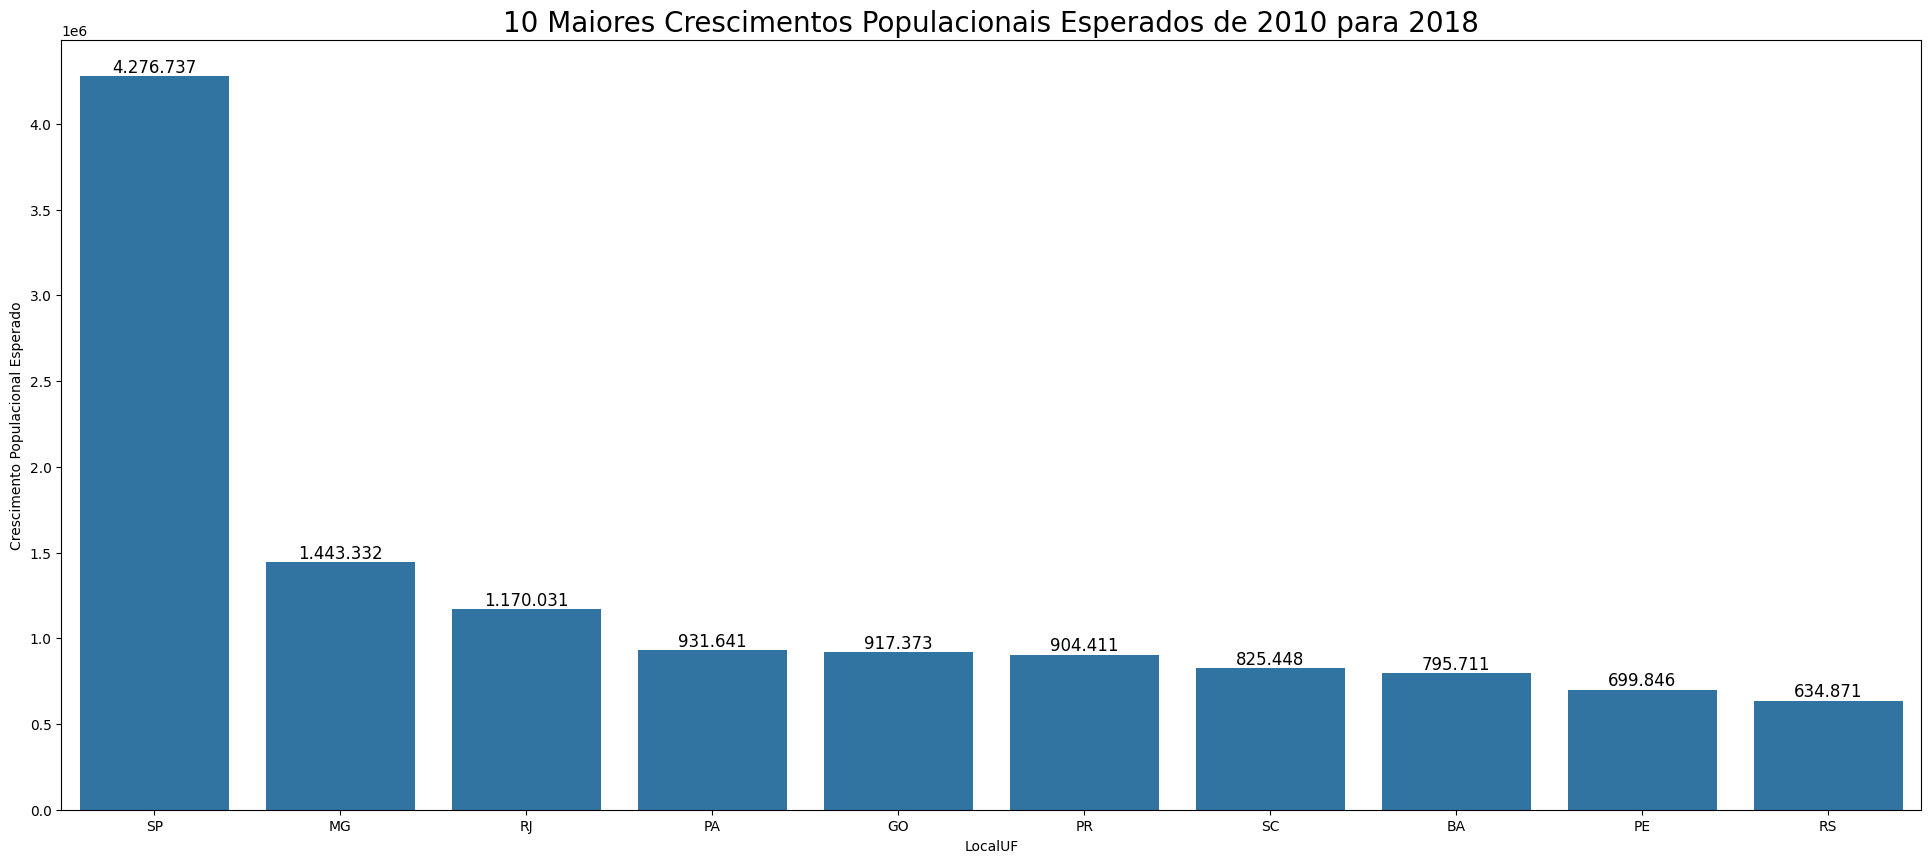

In [ ]:
# Organizando o DataFrame em relação aos 10 maiores valores do "Crescimento Populacional Esperado" em ordem decrescente
Data_States_Top10 = Data_States.sort_values(by=['Crescimento Populacional Esperado'], ascending=False).head(10)

# Definindo o tamanho do gráfico como '24, 10' (24 é o comprimento e 10 a altura)
plt.figure(figsize=(24, 10))

# Atribuindo o gráfico a variável "ax" e o plotando o com os parâmetros Dataset, x = "LocalUF" e  y = "Crescimento Populacional Esperado"
ax = sns.barplot(Data_States_Top10, x="LocalUF", y="Crescimento Populacional Esperado")

# Definindo os rótulos atribuidos as barras do gráfico, formatando-os para que a cada 3 casas seja adicionado um ponto
ax.bar_label(ax.containers[0], fmt='{:,.0f}'.format, labels=[f'{x:,.0f}'.replace(',', '.') for x in ax.containers[0].datavalues], fontsize=12)

# Adicionando título ao gráfico e definindo o tamanho da fonte como 20
ax.set_title("10 Maiores Crescimentos Populacionais Esperados de 2010 para 2018", fontsize=20)

# Exibindo o gráfico
plt.show()

### Confirmando a suposição acima, a Região Sudeste conta com a maior concentração de Receita em 2014 dentre todas as Regiões Brasileiras, porém São Paulo se mostra um estado com a concentração de Receita muito superior as outros estados da Região Sudeste, tendo uma receita quase 4 vezes maior que o estado de Minas Gerais que é o segundo com maior Receita de todos os estados brasileiros. Veremos agora se isso se reflete também no IDH destes Estados.

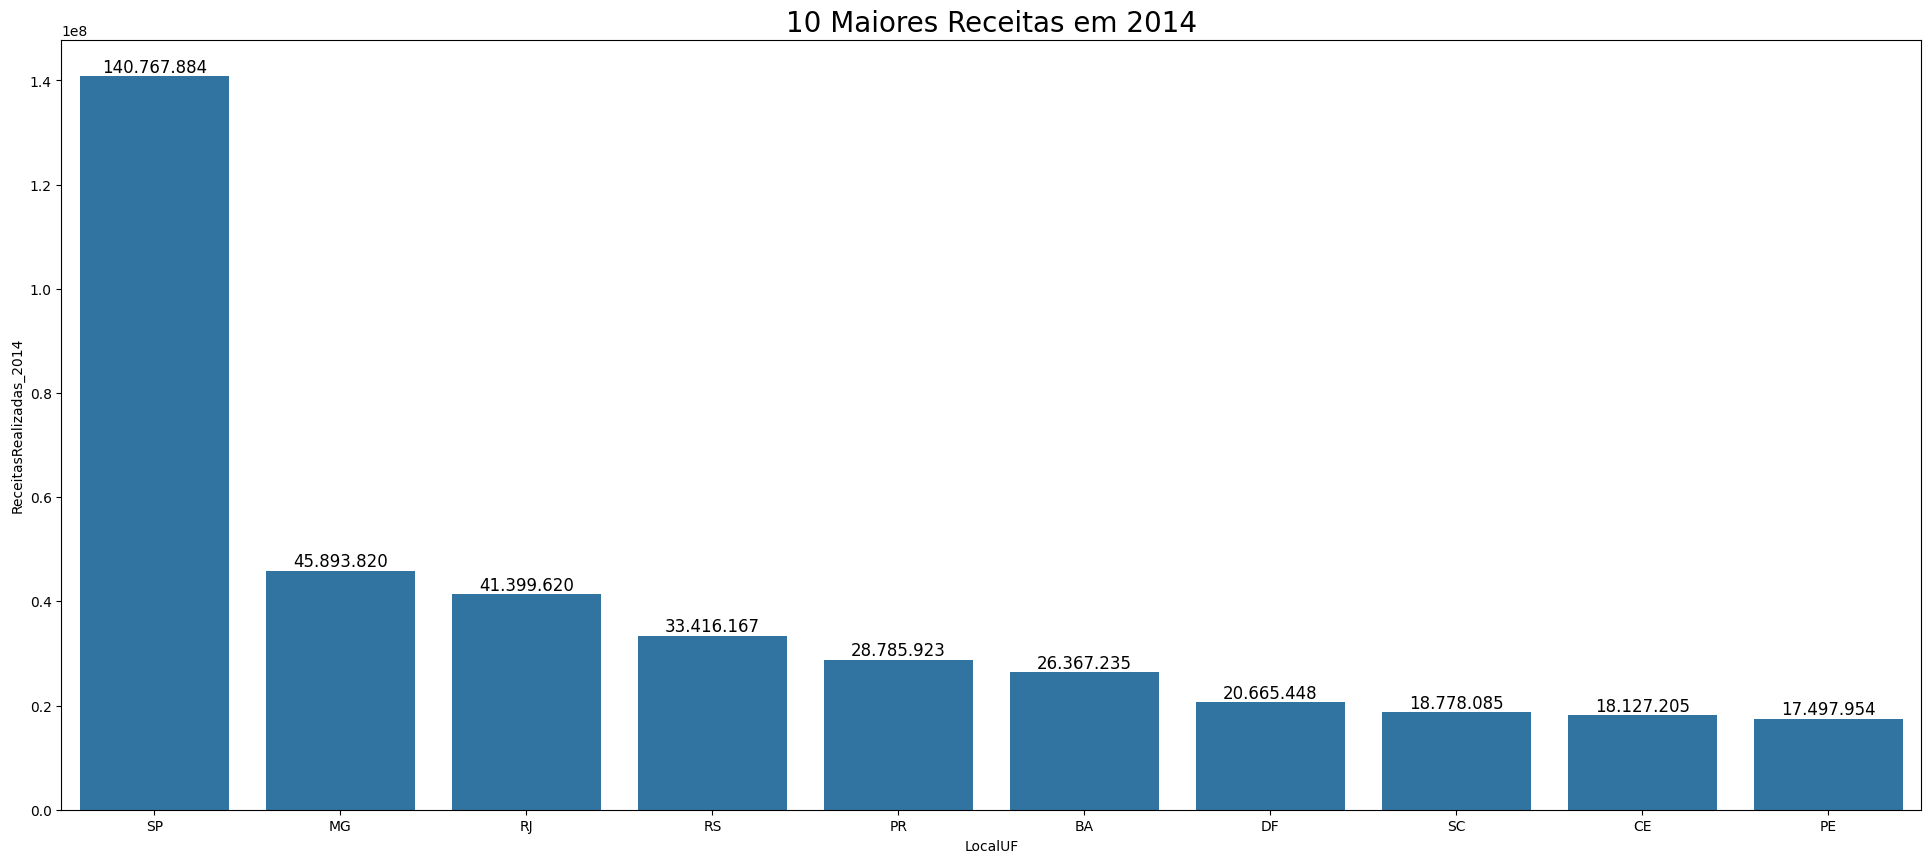

In [ ]:
# Organizando o DataFrame em relação aos 10 maiores valores de Receitas em ordem decrescente
Data_States_Top10 = Data_States.sort_values(by=['ReceitasRealizadas_2014'], ascending=False).head(10)

# Definindo o tamanho do gráfico como '24, 10' (24 é o comprimento e 10 a altura)
plt.figure(figsize=(24, 10))

# Atribuindo o gráfico a variável "ax" e o plotando o com os parâmetros Dataset, x = "LocalUF" e  y = "ReceitasRealizadas_2014"
ax = sns.barplot(Data_States_Top10, x="LocalUF", y="ReceitasRealizadas_2014")

# Definindo os rótulos atribuidos as barras do gráfico, formatando-os para que a cada 3 casas seja adicionado um ponto
ax.bar_label(ax.containers[0], fmt='{:,.0f}'.format, labels=[f'{x:,.0f}'.replace(',', '.') for x in ax.containers[0].datavalues], fontsize=12)

# Adicionando título ao gráfico e definindo o tamanho da fonte como 20
ax.set_title("10 Maiores Receitas em 2014", fontsize=20)

# Exibindo o gráfico
plt.show()

### O estado de São Paulo se mostra bem proporcional quando se refere a Receita e a Despesa sendo o estado com os maiores valores dessas duas colunas, Minas Gerais segue em segundo nessa lista da mesma forma que se apresenta no gráfico das Receitas por estado

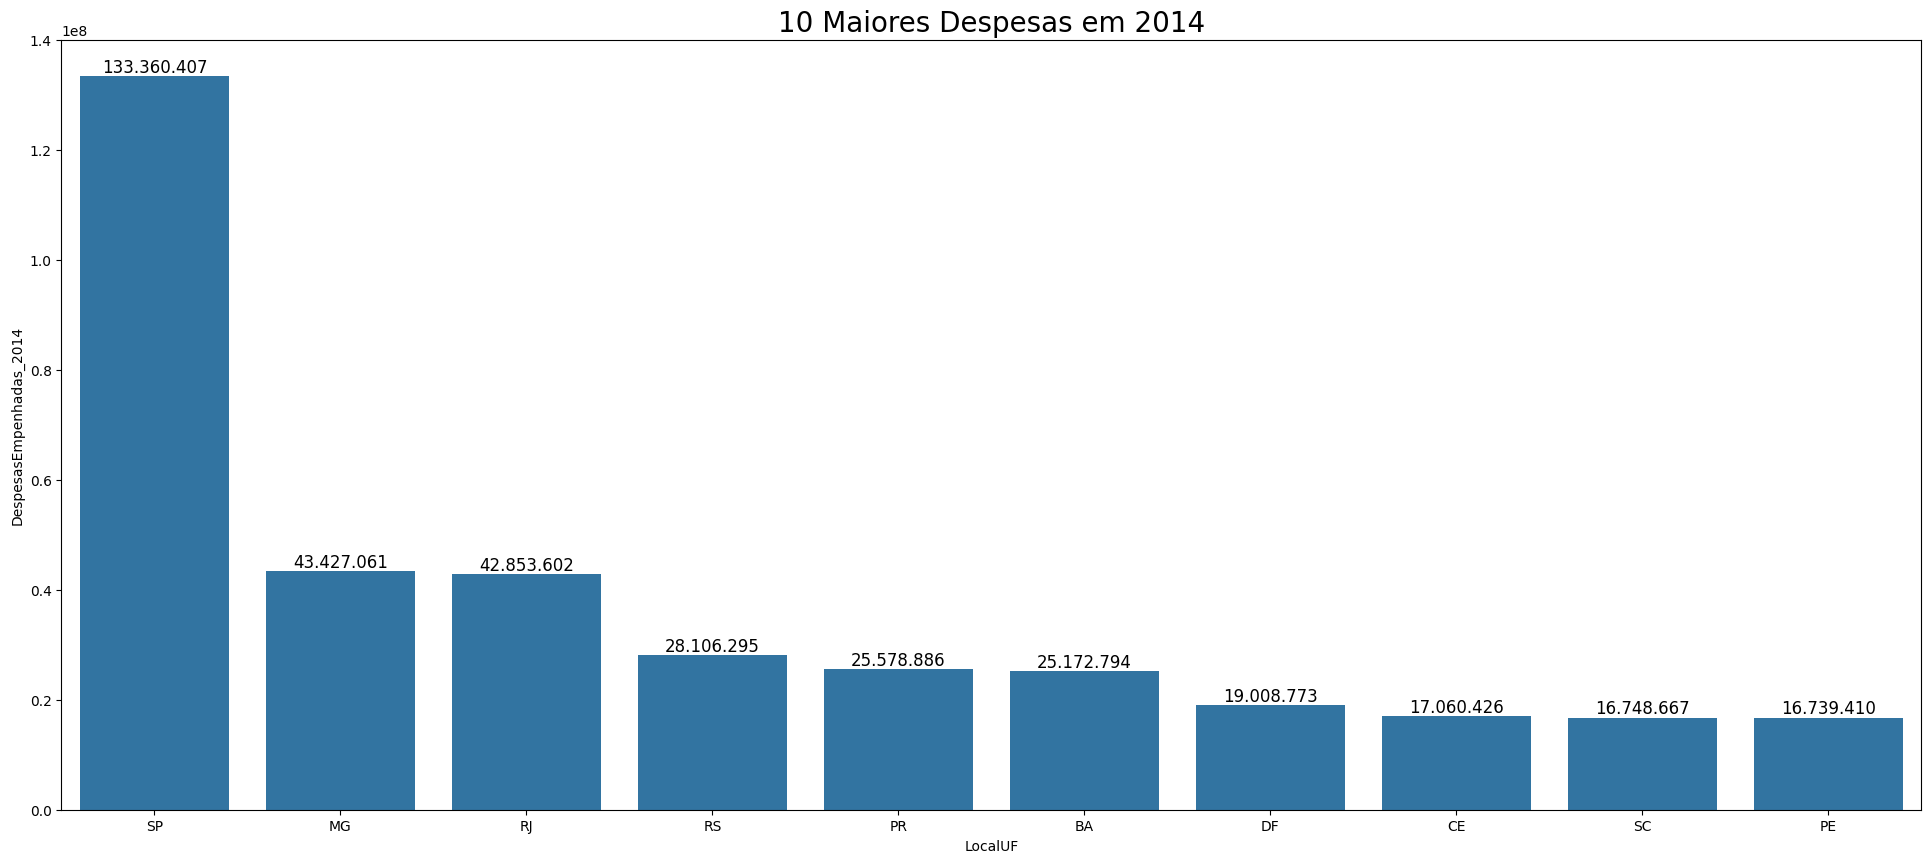

In [ ]:
# Organizando o DataFrame em relação aos 10 maiores valores de Despesas em ordem decrescente
Data_States_Top10 = Data_States.sort_values(by=['DespesasEmpenhadas_2014'], ascending=False).head(10)

# Definindo o tamanho do gráfico como '24, 10' (24 é o comprimento e 10 a altura)
plt.figure(figsize=(24, 10))

# Atribuindo o gráfico a variável "ax" e o plotando o com os parâmetros Dataset, x = "LocalUF" e  y = "DespesasEmpenhadas_2014"
ax = sns.barplot(Data_States_Top10, x="LocalUF", y="DespesasEmpenhadas_2014")

# Definindo os rótulos atribuidos as barras do gráfico, formatando-os para que a cada 3 casas seja adicionado um ponto
ax.bar_label(ax.containers[0], fmt='{:,.0f}'.format, labels=[f'{x:,.0f}'.replace(',', '.') for x in ax.containers[0].datavalues], fontsize=12)

# Adicionando título ao gráfico e definindo o tamanho da fonte como 20
ax.set_title("10 Maiores Despesas em 2014", fontsize=20)

# Exibindo o gráfico
plt.show()

### Diferente do que vimos em relação as maiores Receitas por Estado, em relação ao IDH o Distrito Federal aparece em primeiro lugar em relação aos outros estados brasileiros, logo em seguida se encontra São Paulo e depois Santa Catarina. Podemos constatar que o estado do Distrito Federal tem um grau de desenvolvimento econômico e uma qualidade de vida melhor que o estado de São Paulo mesmo que as Receitas do estado de São Paulo sejam 7 vezes maiores que a do Estado do Distrito Federal.

### Anteriormente na análise do IDH por Região, vimos que a Região Sul era a que tinha o maior IDH de todas as Regiões Brasileiras e podemos constatar isso nesse gráfico que mostra que Santa Catarina, Rio Grande do Sul e Paraná tem, respectivamente, os 3º, 4º e 6º maiores IDH de todos os estados brasileiros.

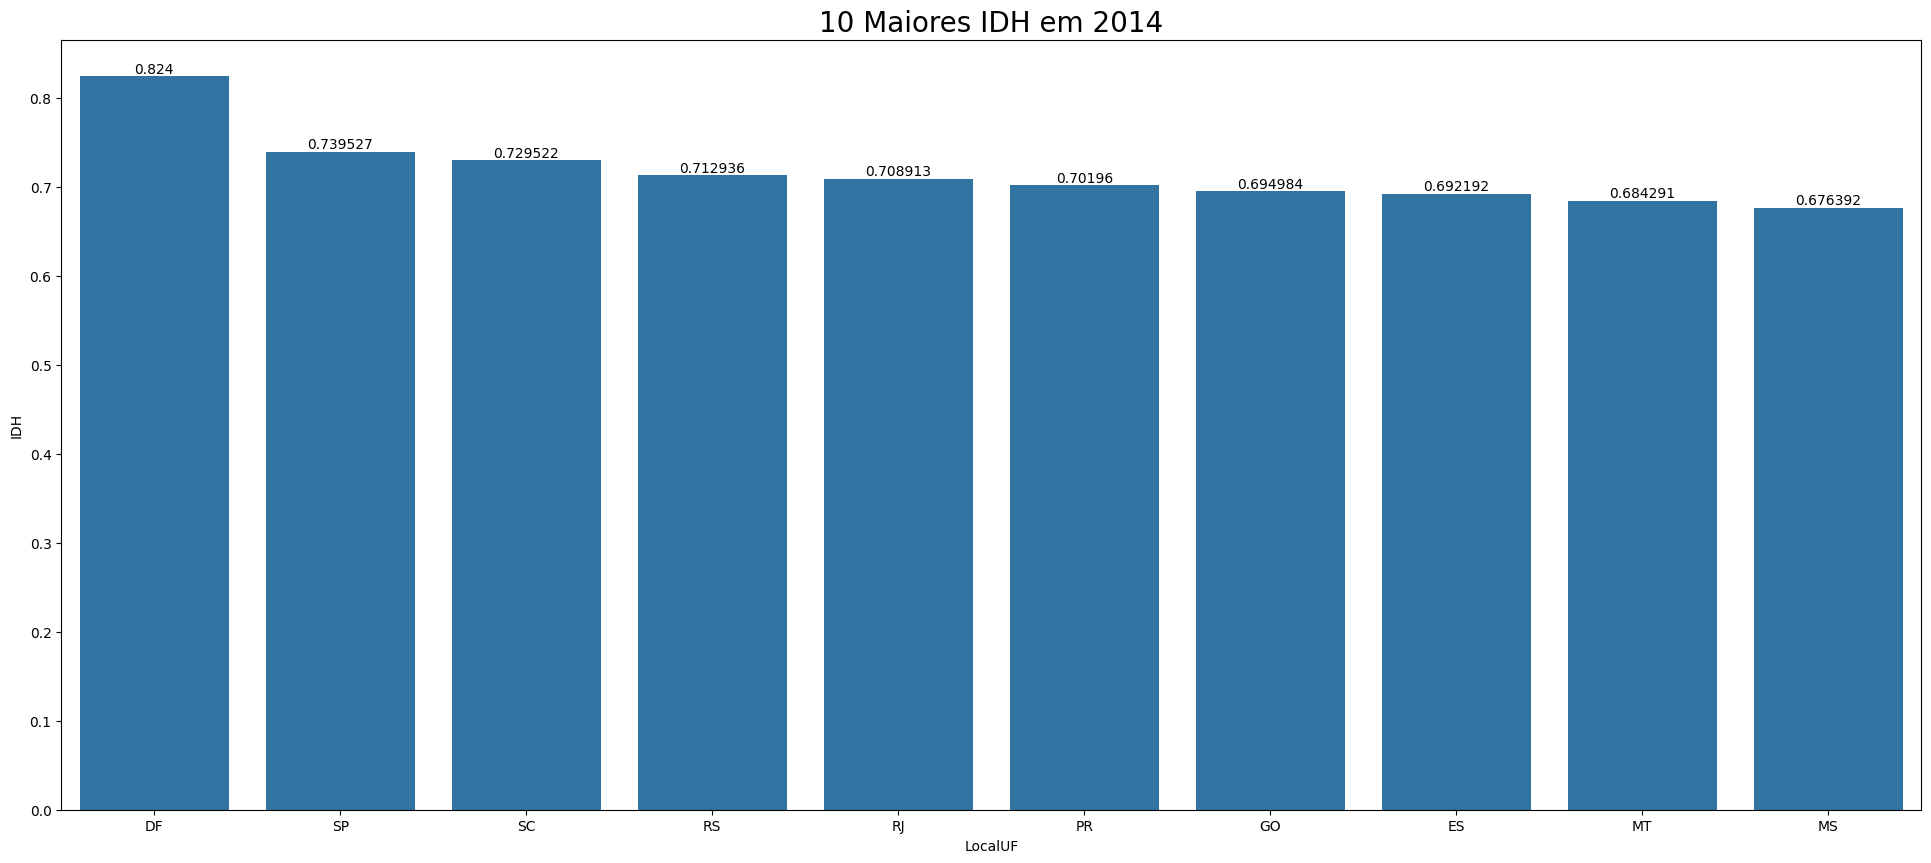

In [ ]:
# Organizando o DataFrame em relação aos 10 maiores IDH (Índice de Desenvolvimento Humano) em ordem decrescente
Data_States_Top10 = Data_States.sort_values(by=['IDH'], ascending=False).head(10)

# Definindo o tamanho do gráfico como '24, 10' (24 é o comprimento e 10 a altura)
plt.figure(figsize=(24, 10))

# Atribuindo o gráfico a variável "ax" e o plotando o com os parâmetros Dataset, x = "LocalUF" e  y = "IDH"
ax = sns.barplot(Data_States_Top10, x="LocalUF", y="IDH")

# Definindo os rótulos atribuidos as barras do gráfico, formatando-os para que a cada 3 casas seja adicionado um ponto
ax.bar_label(ax.containers[0])

# Adicionando título ao gráfico e definindo o tamanho da fonte como 20
ax.set_title("10 Maiores IDH em 2014", fontsize=20)

# Exibindo o gráfico
plt.show()

## Iremos analisar graficamente a variável 'Grupo' associado a outras varáveis do DataFrame.
### A coluna 'Grupo' é definida para determinar grupos que são definidos com base nos valores das Receitas e Despesas. A classificação 'Baixa' está relacionada a valores que estão abaixo do primeiro quartil, ou seja, está associado 25% menores valores da coluna que foi associada, o 'Média' para valores acima do primeiro quartil e abaixo do terceiro quartil ou dos valores entre 25% a 75% da coluna associada e o 'Alta' para valores acima do terceiro quartil em diante, ou seja, valores maiores que 75% dos menores valores da coluna até o valor máximo.

In [ ]:
# Calculando os quartis
q1_receitas = Cities_Brazil['ReceitasRealizadas_2014'].quantile(0.25)
q3_receitas = Cities_Brazil['ReceitasRealizadas_2014'].quantile(0.75)

q1_despesas = Cities_Brazil['DespesasEmpenhadas_2014'].quantile(0.25)
q3_despesas = Cities_Brazil['DespesasEmpenhadas_2014'].quantile(0.75)

# Criando função para categorizar os valores
def categorizar(valor, q1, q3):
    if valor <= q1:
        return 'Baixa'
    elif valor <= q3:
        return 'Média'
    else:
        return 'Alta'

# Aplicando a função para criar novas colunas
Cities_Brazil['Faixa_Receitas'] = Cities_Brazil['ReceitasRealizadas_2014'].apply(categorizar, args=(q1_receitas, q3_receitas))
Cities_Brazil['Faixa_Despesas'] = Cities_Brazil['DespesasEmpenhadas_2014'].apply(categorizar, args=(q1_despesas, q3_despesas))

# Criando uma coluna com a combinação das faixas
Cities_Brazil['Grupo'] = Cities_Brazil['Faixa_Receitas'] + ' ' +  'Receita' + ' ' + 'e' + ' ' + Cities_Brazil['Faixa_Despesas'] + ' ' + 'Despesa'

# Agrupando os dados por grupo
grupos = Cities_Brazil.groupby('Grupo')

# Analisando cada grupo
for nome_grupo, grupo in grupos:
    print(f"Grupo: {nome_grupo}")
    print("--------------------------------------------------------------------")
    print(grupo.describe())
    print("\n")

Grupo: Alta Receita e Alta Despesa
--------------------------------------------------------------------
           IBGECode  PopEstimada_2018  PopCenso 2010         IDHM  \
count  1.339000e+03      1.339000e+03   1.339000e+03  1339.000000   
mean   3.255421e+06      1.142643e+05   1.037308e+05     0.692176   
std    9.592992e+05      4.370865e+05   4.038244e+05     0.074033   
min    1.100015e+06      6.218000e+03   4.505000e+03     0.483000   
25%    2.608775e+06      2.863750e+04   2.610400e+04     0.634000   
50%    3.300233e+06      4.275100e+04   3.913200e+04     0.711000   
75%    4.104228e+06      8.006850e+04   7.382050e+04     0.751000   
max    5.300108e+06      1.217687e+07   1.125350e+07     0.862000   

       ReceitasRealizadas_2014  DespesasEmpenhadas_2014       Pib_2014  \
count             1.339000e+03             1.339000e+03    1339.000000   
mean              3.131191e+05             2.929585e+05   25909.929627   
std               1.573625e+06             1.546212e

## Faremos um Dataframe com apenas essas duas colunas, pois só usaremos elas no gráfico logo a seguir

In [ ]:
# Agrupando os dados por 'Grupo' e calculando a média da coluna 'PopCenso 2010'
populacao_media_por_grupo = Cities_Brazil.groupby('Grupo')['PopCenso 2010'].mean().reset_index()

# Exibindo o DataFrame resultante
populacao_media_por_grupo

Grupo  PopCenso 2010
0    Alta Receita e Alta Despesa  103730.837192
1   Alta Receita e Baixa Despesa   30249.333333
2   Alta Receita e Média Despesa   18851.117647
3   Baixa Receita e Alta Despesa  185898.666667
4  Baixa Receita e Baixa Despesa   17139.865956
5  Baixa Receita e Média Despesa    5303.729730
6   Média Receita e Alta Despesa   21924.104167
7  Média Receita e Baixa Despesa    3181.493506
8  Média Receita e Média Despesa    9588.180143

### Agrupando as cidades por Grupo, fazendo a contagem da quantidade de cidades em cada grupo e resetando o index para usarmos a coluna 'Grupo'

In [ ]:
cities_by_group = Cities_Brazil.groupby('Grupo')['LocalCidade'].count().reset_index()
# Renomeando a coluna 'LocalCidade' para 'city_count' para melhor clareza. A modificação é feita inplace, ou seja, diretamente no DataFrame original
cities_by_group.rename(columns={'LocalCidade': 'city_count'}, inplace=True)

### Podemos observar que as maiores concentrações de cidades por grupo estão nos grupos 'Média Receita e Média Despesa' com 2.659 cidades, 'Alta Receita e Alta Despesa' com  1339 cidades e 'Baixa Receita e Baixa Despesa'. Portanto podemos observar que existe uma heterogeneidade bastante relevante em relação as Despesas e Receitas entre as cidades brasileiras.

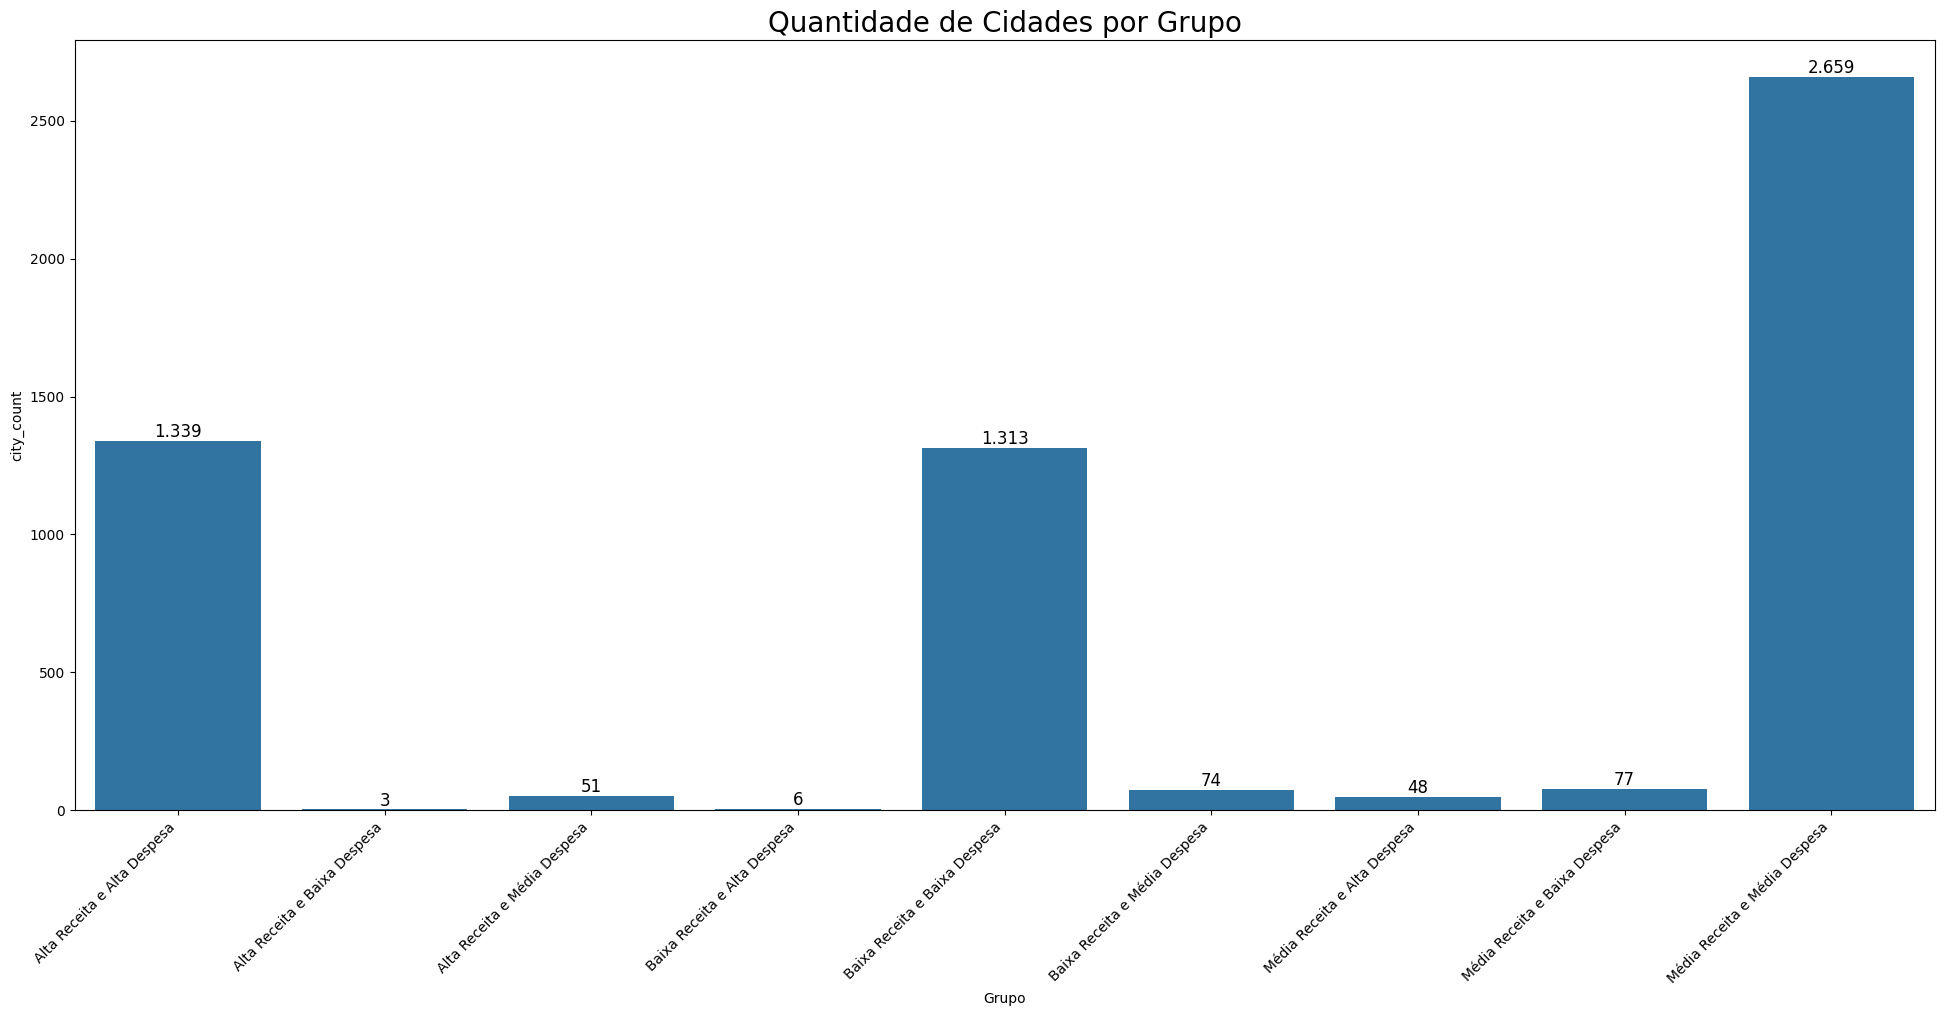

In [ ]:
# Definindo o tamanho do gráfico como '24, 10' (24 é o comprimento e 10 a altura)
plt.figure(figsize=(24, 10))

# Atribuindo o gráfico a variável "ax" e o plotando o com os parâmetros
# Dataset, x = "Grupo" e  y = "city_count"
ax = sns.barplot(cities_by_group, x = "Grupo", y = "city_count")

# Definindo os rótulos atribuidos as barras do gráfico, formatando-os para que a
# cada 3 casas seja adicionado um ponto
ax.bar_label(ax.containers[0], fmt='{:,.0f}'.format, labels=[f'{x:,.0f}'.replace(',', '.') for x in ax.containers[0].datavalues], fontsize=12)

# Adicionando título ao gráfico e definindo o tamanho da fonte como 20
ax.set_title("Quantidade de Cidades por Grupo", fontsize=20)

# Rotacionando os rótulos do eixo x em 45 graus
plt.xticks(rotation=45, ha='right') #ha='right' alinha os rótulos à direita

# Exibindo o gráfico
plt.show()

### Analisando este gráfico podemos concluir que a média populacional nas cidades com 'Baixa Receita e Alta Despesa' é a maior dentre as outras, porém há apenas 6 cidades que se enquadram nessa categoria, portanto podem ser vistas com exceções a regra, vemos em seguida a média populacional das cidades com 'Alta Receita e Alta Despesa' que tem 1339 cidades que integram esse grupo, grupo bastante expressivo para nossa análise.
### O grupo de 'Alta Receita e Baixa Despesa' está em terceiro lugar quando se refere a média populacional, porém esse grupo contém apenas 3 cidades, não sendo tão relevante como os outros.
### O grupo 'Média Receita e Média Despesa' conta com uma média populacional muito baixa, a terceira menor dentre os grupos, porém é o grupo com maior quantidade de cidades dentro dele, com isso concluímos que a maior parte das cidades brasileiras tem uma arrecadação média de valores, gastos médios e estão em maior quantidade em relação as outras cidades dos outros grupos.

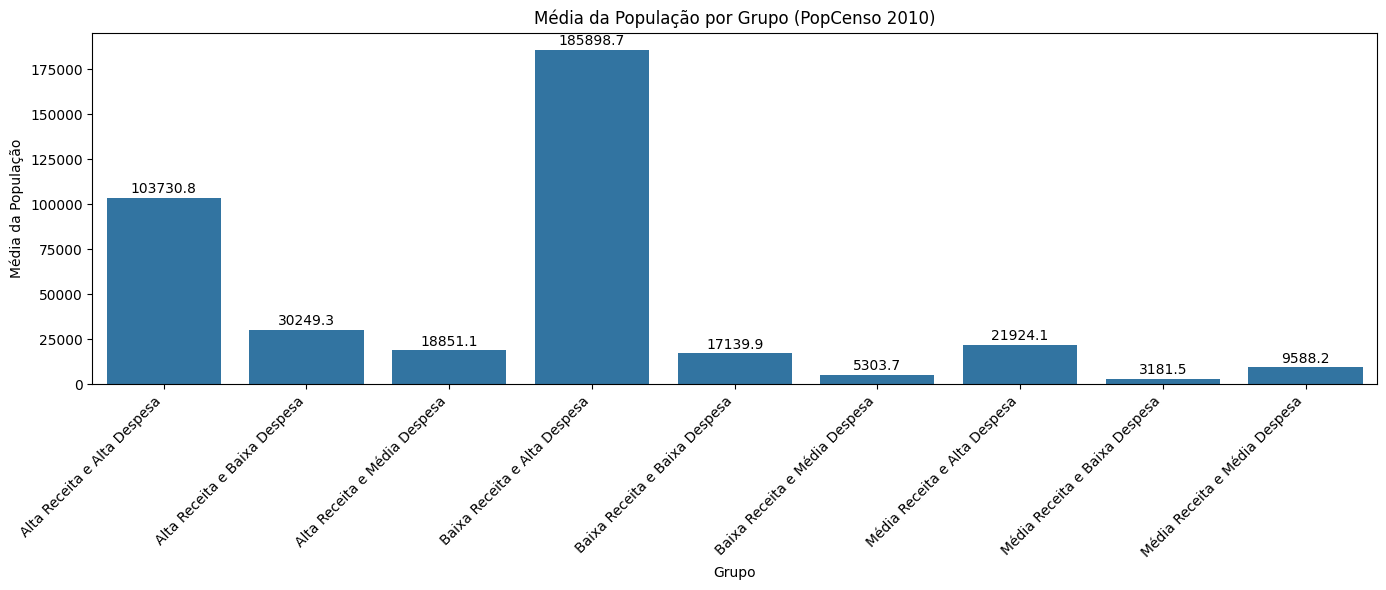

In [ ]:
# Agrupando os dados por 'Grupo' e calcula a média da coluna 'PopCenso 2010' e reseta o index do DataFrame
populacao_media_por_grupo = Cities_Brazil.groupby('Grupo')['PopCenso 2010'].mean().reset_index()

# Criando uma nova figura para o gráfico com um tamanho específico de 14 polegadas de largura por 6 polegadas de altura.
plt.figure(figsize=(14, 6))

# Criando um gráfico de barras usando a biblioteca Seaborn com os parâmetros: x = 'Grupo', y = 'PopCenso 2010', data = populacao_media_por_grupo e o atribui a variável ax.
ax = sns.barplot(x='Grupo', y='PopCenso 2010', data=populacao_media_por_grupo)

# Adicionando os rótulos das barras do gráfico, formatando-os para que a cada 3 casas seja adicionado um ponto, definindo o tamanho da fonte como 10 e o espaçamento como 1.
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=10, padding=1)

# Adicionando um título ao gráfico.
plt.title('Média da População por Grupo (PopCenso 2010)')

# Adicionando um rótulo ao eixo x.
plt.xlabel('Grupo')

# Adicionando um rótulo ao eixo y.
plt.ylabel('Média da População')

# Rotacionando os rótulos do eixo x em 45 graus e os alinha à direita.
plt.xticks(rotation=45, ha='right')

# Ajustando o layout do gráfico para evitar sobreposições de elementos.
plt.tight_layout()

# Exibindo o gráfico.
plt.show()

### Podemos observar que os gráficos dos grupos 'Alta Receita e Alta Despesa', 'Baixa Receita e Baixa Despesa' e 'Média Receita e Média Despesa' são bem parecidos, porém com algumas diferenças.
### O gráfico do grupo 'Alta Receita e Alta Despesa' tem uma mediana e o Q3(Terceiro Qaurtil) maiores que os outros dois, o que quer dizer que existe uma concentração maior de cidades nesse grupo com valores maiores de 'IDHM' do que os outros dois grupos. Com isso podemos constatar que cidades que tem Maiores Receitas e Maiores Despesas tendem a ter um 'IDHM' maior em relação a cidades que tem Receitas e Despesas Médias e Baixas.

### O grupo 'Média Receita e Alta Despesa' se destaca pela existência de outliers (valores que tem um comportamento anormal em relação aos outros), o que pode sugerir que algumas cidades tem um 'IDHM' bem maior que a maioria deste grupo, isso quando estamos falando dos outliers que estão a direita do gráfico, acima do limite superior.

<ipython-input-39-730d31a23995>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = Cities_Brazil, x="IDHM", y = "Grupo",  palette="Set2")


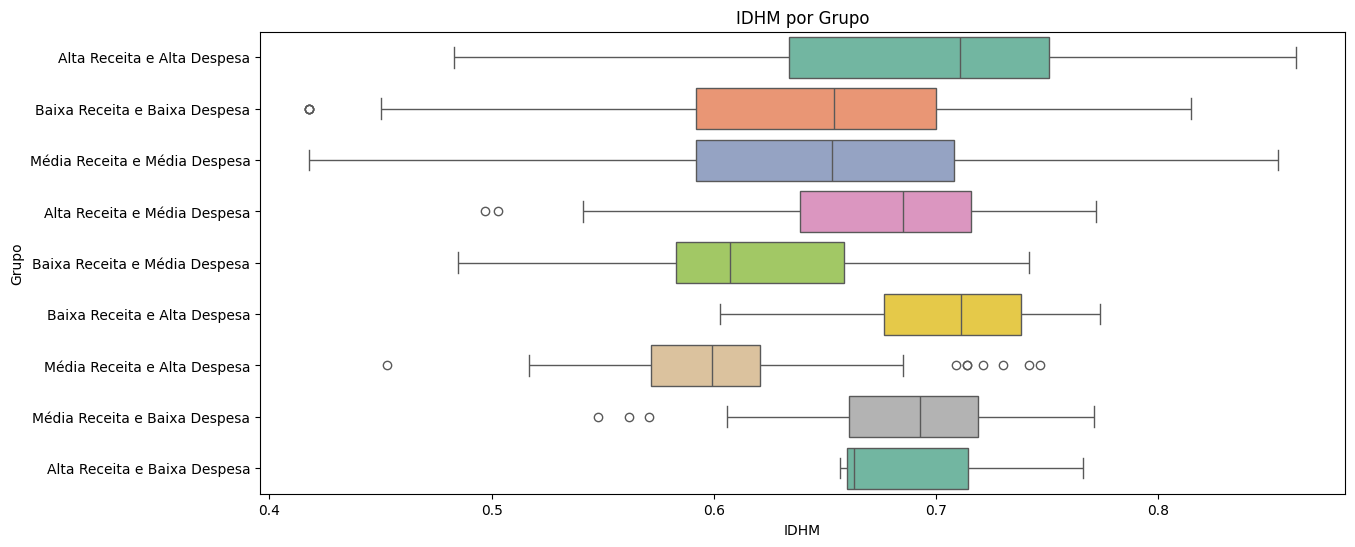

In [ ]:
plt.figure(figsize=(14, 6))  # Aumenta o tamanho do gráfico
sns.boxplot(data = Cities_Brazil, x="IDHM", y = "Grupo",  palette="Set2")
plt.title("IDHM por Grupo")  # Adiciona um título
plt.xlabel("IDHM")  # Adiciona um rótulo ao eixo x
plt.ylabel("Grupo")  # Adiciona um rótulo ao eixo y
plt.show()

### Vemos nesse gráfico que os 'Baixa Receita e Baixa Despesa' e 'Média Receita e Média Despesa' tem muitos outliers associados as seus gráficos, isso quer dizer que existem muitos valores de Pib per capita que são muito maiores que a maioria dos valores desses Grupos. Com isso conseguimos mostrar que as rendas médias das cidades que estão nos grupos citados acima, 'Baixa Receita e Baixa Despesa' e 'Média Receita e Média Despesa', são maiores que as dos demais grupos citados.

<ipython-input-40-52c3531d92cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Cities_Brazil, x="Pib_per_capita_2014", y="Grupo", palette="Set2", width=0.7)  # Ajusta a largura das caixas


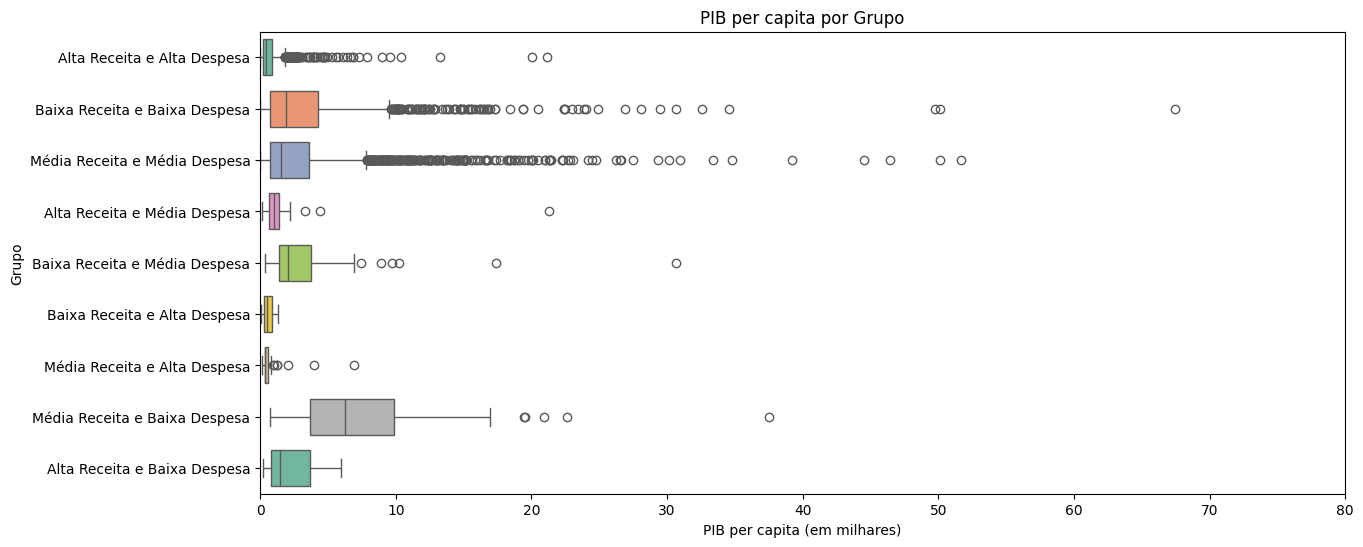

In [ ]:
plt.figure(figsize=(14, 6))  # Aumenta o tamanho do gráfico
sns.boxplot(data=Cities_Brazil, x="Pib_per_capita_2014", y="Grupo", palette="Set2", width=0.7)  # Ajusta a largura das caixas
plt.xlim(0, 80)  # Define os limites do eixo x (ajuste conforme necessário)
plt.title("PIB per capita por Grupo")  # Adiciona um título
plt.xlabel("PIB per capita (em milhares)")  # Adiciona um rótulo ao eixo x
plt.ylabel("Grupo")  # Adiciona um rótulo ao eixo y
plt.show()

### Como já era esperado a população nas cidades tem suas maiores concentrações em municipios com as maiores Receitas e maiores Despesas, pois como existe uma quantidade muito grande de pessoas as cidades acabam recolhendo uma Receita maior e consequentemente tendo um gasto maior que é refletido nas Altas Despesas destes lugares.

### Em segundo lugar, podemos ver que o grupo 'Baixa Receita e Baixa Despesa' tem uma quantidade considerável de outliers tambem, porém nesse caso se dá ao fato de que existem municipios neste grupo que são muito menores que outros do mesmo grupo e acaba criando essa diferença populacional considerável, o que é o oposto do grupo acima, aqui as cidades recolhem uma Receita baixa e por isso tende a tem uma Baixa despesa para sua população.

<ipython-input-41-f46897bd1a82>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Cities_Brazil_copy, x="PopCenso 2010", y="Grupo", width=0.7, palette="Set2")  # Ajusta largura e cores


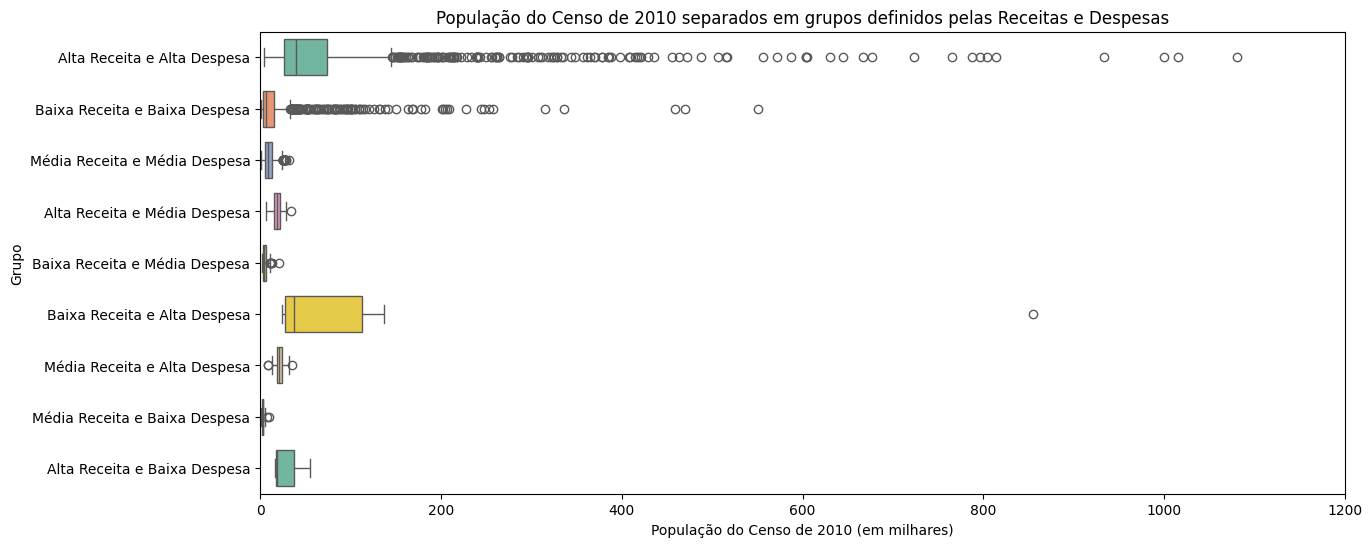

In [ ]:
# Criando uma cópia do DataFrame para evitar modificações no original
Cities_Brazil_copy = Cities_Brazil.copy()

# Dividindo os valores da coluna 'PopCenso 2010' por 1000
Cities_Brazil_copy['PopCenso 2010'] = Cities_Brazil_copy['PopCenso 2010'] / 1000

plt.figure(figsize=(14, 6))  # Aumenta o tamanho do gráfico

sns.boxplot(data=Cities_Brazil_copy, x="PopCenso 2010", y="Grupo", width=0.7, palette="Set2")  # Ajusta largura e cores

plt.xlabel("População do Censo de 2010 (em milhares)")

plt.title("População do Censo de 2010 separados em grupos definidos pelas Receitas e Despesas")

plt.xlim(0, 1200) # Define os limites do eixo x

plt.show()

### Existe uma grande quantidade de cidades com pequena concetração populacional e existem pouquíssimas cidades com uma alta concentração populacional e com São Paulo sendo a cidade com o maior número de pessoas com uma popuplação de 11.256 milhões de habitantes

In [ ]:
# Criando um gráfico de dispersão com Plotly Express
fig = px.scatter(
    Cities_Brazil, # DataFrame com os dados das cidades brasileiras
    x='PopCenso 2010', # Coluna a ser usada no eixo x (População do Censo em 2010)
    hover_data=['PopCenso 2010', 'LocalCidade']) # Dados a serem exibidos ao passar o mouse sobre os pontos

# Configurando o layout do gráfico
fig.update_layout(yaxis_title=None) # Remove o título do eixo y
fig.update_yaxes(showticklabels=False) # Remove os rótulos do eixo y
fig.update_traces(hovertemplate='População Censo 2010: %{x}<br>Cidade: %{customdata[0]}') # Define o formato do texto exibido ao passar o mouse

# Exibindo o gráfico
fig.show()

### O quadro se repete para a variável 'PopEstimada_2018' em relação a variável 'PopCenso 2010', muitas cidades com poucos habitantes e poucas cidades com muitos habitantes.São Paulo segue sendo a cidade mais populosa do Brasil

In [ ]:
# Criando um gráfico de dispersão com Plotly Express
fig = px.scatter(
    Cities_Brazil, # DataFrame com os dados das cidades brasileiras
    x='PopEstimada_2018', # Coluna a ser usada no eixo x (População estimada em 2018)
    hover_data=['PopEstimada_2018', 'LocalCidade']) # Dados a serem exibidos ao passar o mouse sobre os pontos

# Configurando o layout do gráfico
fig.update_layout(yaxis_title=None) # Remove o título do eixo y
fig.update_yaxes(showticklabels=False) # Remove os rótulos do eixo y
fig.update_traces(hovertemplate='População Estimada 2018: %{x}<br>Cidade: %{customdata[0]}') # Define o formato do texto exibido ao passar o mouse

# Exibindo o gráfico
fig.show()

### Podemos constatar a mesma conclusão em relação a dispersão dos dados nos gráficos relacionadsos a Censo Populacional de 2010 e a População Esperada de 2018, há uma grande concentração de cidades do lado esquerdo, nesse caso uma grande quantidade de cidades com Receitas pequenas e do lado direito vemos que pouquíssimas cidades tem um grande valor de Receitas.

In [ ]:
# Criando um gráfico de dispersão com Plotly Express
fig = px.scatter(
    Cities_Brazil,  # DataFrame com os dados das cidades brasileiras
    x='ReceitasRealizadas_2014',  # Coluna a ser usada no eixo x (Receitas Realizadas em 2014)
    hover_data=['ReceitasRealizadas_2014', 'LocalCidade'])  # Dados a serem exibidos ao passar o mouse sobre os pontos

# Configurando o layout do gráfico
fig.update_layout(yaxis_title=None)  # Remove o título do eixo y
fig.update_yaxes(showticklabels=False)  # Remove os rótulos do eixo y
fig.update_traces(hovertemplate='Receitas Realizadas 2014: %{x}<br>Cidade: %{customdata[0]}')  # Define o formato do texto exibido ao passar o mouse

# Exibindo o gráfico
fig.show()

### As despesas seguem as mesmas conclusões em relação a Censo Populacional de 2010, População Esperada de 2018 e as Receitas. Mais uma vez São Paulo se destacando com valores bem acima das demais cidades.

### São Paulo tem as maiores receitas e despesas dentre todas as outras cidades brasileiras, mas será que isso se reflete no Pib per capita e no IDHM (Índice de Desenvolvimento Municipal)? Isso que veremos nos próximos gráficos de dispersão.

In [ ]:
 # Criando um gráfico de dispersão com Plotly Express
fig = px.scatter(
    Cities_Brazil, # DataFrame com os dados das cidades brasileiras
    x='DespesasEmpenhadas_2014', # Coluna a ser usada no eixo x (Despesas Empenhadas em 2014)
    hover_data=['DespesasEmpenhadas_2014', 'LocalCidade']) # Dados a serem exibidos ao passar o mouse sobre os pontos

fig.update_layout(yaxis_title=None) # Removendo o título do eixo y
fig.update_yaxes(showticklabels=False) # Removendo os rótulos do eixo y
fig.update_traces(hovertemplate='Despesas Empenhadas 2014: %{x}<br>Cidade: %{customdata[0]}') # Definindo o formato do texto exibido ao passar o mouse

fig.show() # Exibindo o gráfico

### Como podemos observar, São Paulo não aparece nem como sendo o maior Pib de 2014 nem um dos maiores, o que mostra que mesmo com as maiores Receitas e Despesas, a cidade de São Paulo não é nem de perto uma das cidades com maiores valores monetários de bens e serviços

In [ ]:
# Criando um gráfico de dispersão com Plotly Express
fig = px.scatter(
    Cities_Brazil, # DataFrame com os dados das cidades brasileiras
    x='Pib_2014', # Coluna a ser usada no eixo x (Pib 2014)
    hover_data=['Pib_2014', 'LocalCidade']) # Dados a serem exibidos ao passar o mouse sobre os pontos

fig.update_layout(yaxis_title=None) # Remove o título do eixo y
fig.update_yaxes(showticklabels=False) # Remove os rótulos do eixo y
fig.update_traces(hovertemplate='Pib_2014: %{x}<br>Cidade: %{customdata[0]}') # Define o formato do texto exibido ao passar o mouse

fig.show() # Exibe o gráfico

### Curiosamente algumas cidades que apareciam com valores bem maiores do que a maioria nos gráficos de dispersão acima, não aparecem aqui com valores tão discrepantes da média, isso se reforça no boxplot que analisamos os grupos relacionados ao Pib per capita 2014 e vimos que o grupo 'Alta Receita e Alta Despesa' tinha valores em média menores que os grupos 'Média Receita e Média Despesa' e 'Baixa Receita e Baixa Despesa'.

In [ ]:
# Criando um gráfico de dispersão com Plotly Express
fig = px.scatter(
    Cities_Brazil, # DataFrame com os dados das cidades brasileiras
    x='Pib_per_capita_2014', # Coluna a ser usada no eixo x (Pib per capita em 2014)
    hover_data=['Pib_per_capita_2014', 'LocalCidade']) # Dados a serem exibidos ao passar o mouse sobre os pontos

fig.update_layout(yaxis_title=None) # Remove o título do eixo y
fig.update_yaxes(showticklabels=False) # Remove os rótulos do eixo y
fig.update_traces(hovertemplate='Pib_per_capita_2014: %{x}<br>Cidade: %{customdata[0]}') # Define o formato do texto exibido ao passar o mouse

fig.show() # Exibe o gráfico

## Iremos excluir todas as colunas e manteremos apenas as colunas 'LocalCidade' e 'IDHM' para analisar quais são as 10 cidades com maiores IDHM e as 10 cidades com os piores IDHM.

In [ ]:
# Utilizando função "drop" para exclusão de todas as colunas exceto "LocalCidade" e "IDHM"
Data_Cities = Cities_Brazil[['LocalCidade', 'IDHM']]
Data_Cities

LocalCidade   IDHM
0     ALTA FLORESTA D'OESTE  0.641
1                 ARIQUEMES  0.702
2                    CABIXI  0.650
3                    CACOAL  0.718
4                CEREJEIRAS  0.692
...                     ...    ...
5565             VIANOPOLIS  0.712
5566         VICENTINOPOLIS  0.684
5567               VILA BOA  0.647
5568          VILA PROPICIO  0.634
5569               BRASILIA  0.824

[5570 rows x 2 columns]

In [ ]:
# Organizando DataFrame 'Data_Cities' em relação aos 10 maiores valores do "IDHM" em ordem decrescente
Data_Cities_Top10 = Data_Cities.sort_values(by=['IDHM'], ascending=False).head(10)
Data_Cities_Top10

LocalCidade   IDHM
3812  SAO CAETANO DO SUL  0.862
3273  AGUAS DE SAO PEDRO  0.854
4398       FLORIANOPOLIS  0.847
4337  BALNEARIO CAMBORIU  0.845
3174             VITORIA  0.845
3809              SANTOS  0.840
3222             NITEROI  0.837
4446             JOACABA  0.827
5569            BRASILIA  0.824
4005            CURITIBA  0.823

### Como podemos observar, realmente, São Paulo não se encontra entre as cidades com os 10 maiores IDHM, mesmo que ela tenha as maiores receitas, despesas população de acordo com o censo de 2010 e estimativa popualcional de 2018

### Agora analisando as cidades em si desse gráfico, vemos que o maior IDHM é de São Caetano do Sul, cidade que se encontra no estado de São Paulo, logo em seguida vem Águas de São Pedro que tambem é uma cidade Paulista, os dois seguintes são 'Florianópolis' e 'Balneario Camboriu' duas cidades do estado de Santa Catarina, o que está bastante de acordo com o que vimos a respeito dos 10 maiores IDH dos estados brasileiros com o estado de São Paulo em segunda colocação e o estado de Santa Catarina em terceiro, apesar de que Brasilia está na nona posição e o Distrito Federal no gráfico dos 10 maiores IDH por estado está em primeiro lugar

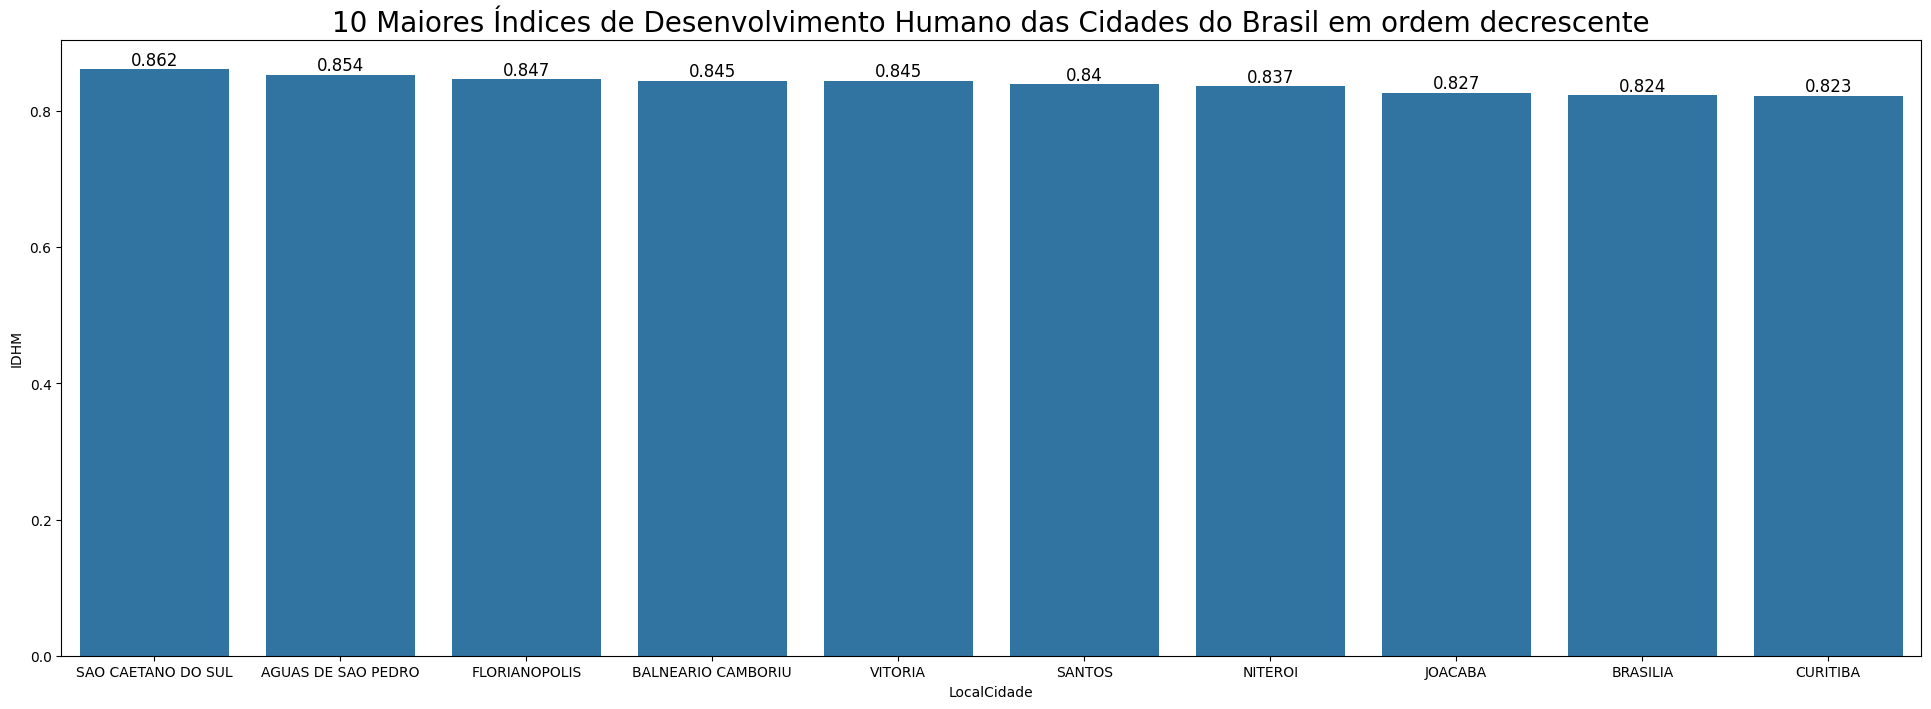

In [ ]:
# Definindo o tamanho do gráfico como '24, 8' (24 é o comprimento e 8 a altura)
plt.figure(figsize=(24, 8))

# Atribuindo o gráfico a variável "ax" e o plotando o com os parâmetros Data = Data_Cities_Top10, x = "LocalCidade" e  y = "IDHM"
ax = sns.barplot(Data_Cities_Top10, x="LocalCidade", y="IDHM")

# Definimos os rótulos atribuidos as barras do gráfico com uma fonte de tamanho 12
ax.bar_label(ax.containers[0], labels=Data_Cities_Top10['IDHM'] ,fontsize=12)

# Adicionando o título
ax.set_title("10 Maiores Índices de Desenvolvimento Humano das Cidades do Brasil em ordem decrescente", fontsize=20)


# Exibindo gráfico
plt.show()

In [ ]:
# Organizando DataFrame em relação aos 10 menores valores do "IDHM" em ordem decrescente
Data_Cities_Worst10 = Data_Cities.sort_values(by=['IDHM'], ascending=False).tail(10)
Data_Cities_Worst10

LocalCidade   IDHM
560      MARAJA DO SENA  0.452
79     ATALAIA DO NORTE  0.450
520     FERNANDO FALCAO  0.443
4503     PESCARIA BRAVA  0.418
803             NAZARIA  0.418
4923     PINTO BANDEIRA  0.418
5160  PARAISO DAS AGUAS  0.418
224    MOJUI DOS CAMPOS  0.418
221             MELGACO  0.418
4605   BALNEARIO RINCAO  0.418

## Agora observaremos os 10 menores IDHM das Cidades Brasileiras.
### Primeiro como já foi falado acima, a coluna 'IDHM' apresentava valores NAN e tivemos que competá-los com os valores mínimos dessa coluna, por isso da quarta até a décima cidade os valores de IDHM são iguais. Um IDHM abaixo de 0.5 indica que essas cidades aprensentam uma qualidade muito baixa de serviços de saúde, expectativa de vida dos habitantes é reduzida, nível de escolaridade é baixo e uma distribuição de renda muito desbalanceada. Curiosamente, podemos ver que as cidades são distribuídas por vários estados brasileiros diferentes, inclusive com IDH alto, como por exemplo, Pescaria Brava é uma cidade do estado de Santa Catarina que, como vimos anteriormente, tem o terceiro maior IDH entre os estados brasileiros, portanto podemos constatar que a distribuição de renda precária é algo comum em vários estados brasileiros mesmo que eles tenham um IDH alto.

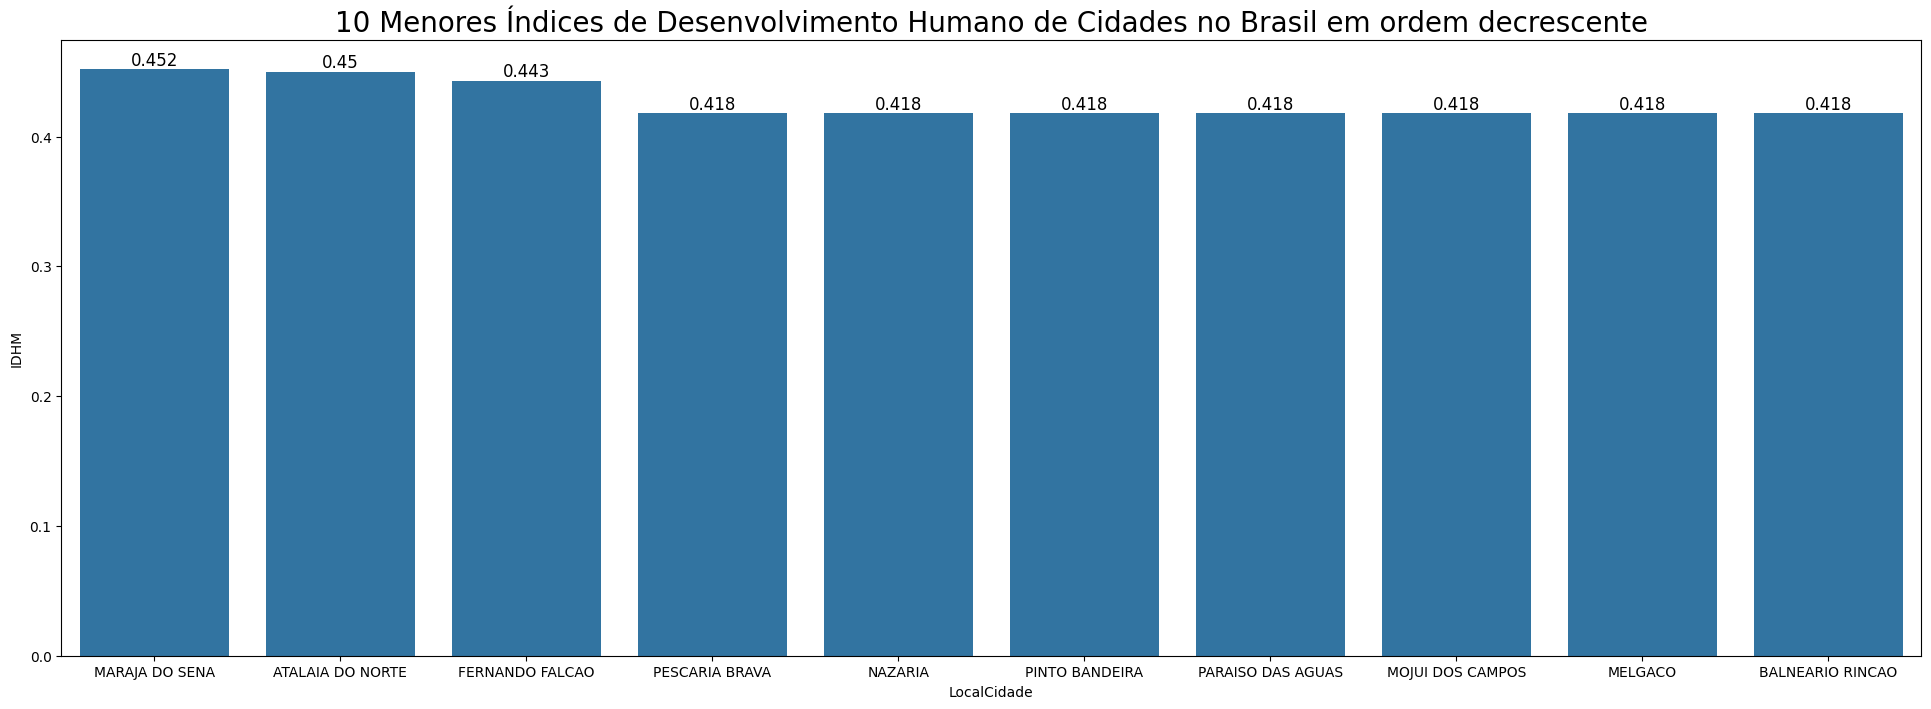

In [ ]:
# Definindo o tamanho do gráfico como '24, 8' (24 é o comprimento e 8 a altura)
plt.figure(figsize=(24, 8))

# Atribuindo o gráfico a variável "ax" e o plotando o com os parâmetros Data = Data_Cities_Worst10, x = "LocalCidade" e  y = "IDHM"
ax = sns.barplot(Data_Cities_Worst10, x="LocalCidade", y="IDHM")

# Definimos os rótulos atribuidos as barras do gráfico com uma fonte de tamanho 12
ax.bar_label(ax.containers[0], labels=Data_Cities_Worst10['IDHM'] ,fontsize=12)

# Adicionando o título
ax.set_title("10 Menores Índices de Desenvolvimento Humano de Cidades no Brasil em ordem decrescente", fontsize=20)

# Exibindo gráfico
plt.show()

## Exibindo DataFrame original

In [ ]:
Cities_Brazil

IBGECode            LocalCidade LocalUF       LocalEstado RegiaoBrasil  \
0      1100015  ALTA FLORESTA D'OESTE      RO          Rondonia            N   
1      1100023              ARIQUEMES      RO          Rondonia            N   
2      1100031                 CABIXI      RO          Rondonia            N   
3      1100049                 CACOAL      RO          Rondonia            N   
4      1100056             CEREJEIRAS      RO          Rondonia            N   
...        ...                    ...     ...               ...          ...   
5565   5222005             VIANOPOLIS      GO             Goiás           CO   
5566   5222054         VICENTINOPOLIS      GO             Goiás           CO   
5567   5222203               VILA BOA      GO             Goiás           CO   
5568   5222302          VILA PROPICIO      GO             Goiás           CO   
5569   5300108               BRASILIA      DF  Distrito Federal           CO   

     Latitude Longitude         Gentilico  PopEstimada_2018  PopCenso 2010  \
0     -119283   -619953    alta-florense              23167          24392   
1     -990571   -630325      ariquemense             106168          90353   
2     -134945    -60552       cabixiense               5438           6313   
3     -114343   -614562       cacoalense              84813          78574   
4      -13187   -608168     cerejeirense              16444          17029   
...       ...       ...               ...               ...            ...   
5565  -167405   -485159      vianopolino              13746          12548   
5566  -177322   -498047  vicentinopolino               8611           7371   
5567  -150387    -47052       vilaboense               6026           4735   
5568  -154542   -488819      propiciense               5758           5145   
5569  -157795   -479297      brasiliense            2974703        2570160   

       IDHM  ReceitasRealizadas_2014  DespesasEmpenhadas_2014  Pib_2014  \
0     0.641                    53490                    47577  16461.11   
1     0.702                      324                     3498  19401.43   
2     0.650                    22635                    19354  18346.17   
3     0.718                   169636                   155473  20725.23   
4     0.692                    53147                    46774  22179.17   
...     ...                      ...                      ...       ...   
5565  0.712                    37777                    33220  23237.24   
5566  0.684                    26783                    23511  39480.36   
5567  0.647                    17295                    15646  18992.37   
5568  0.634                    19148                    16785  35691.39   
5569  0.824                 20665448                 19008773  73971.05   

      Pib_per_capita_2014 Faixa_Receitas Faixa_Despesas  \
0                0.674857           Alta           Alta   
1                0.214729          Baixa          Baixa   
2                2.906094          Média          Média   
3                0.263767           Alta           Alta   
4                1.302435           Alta           Alta   
...                   ...            ...            ...   
5565             1.851868          Média          Média   
5566             5.356174          Média          Média   
5567             4.011060          Média          Média   
5568             6.937102          Média          Média   
5569             0.028781           Alta           Alta   

                              Grupo  
0       Alta Receita e Alta Despesa  
1     Baixa Receita e Baixa Despesa  
2     Média Receita e Média Despesa  
3       Alta Receita e Alta Despesa  
4       Alta Receita e Alta Despesa  
...                             ...  
5565  Média Receita e Média Despesa  
5566  Média Receita e Média Despesa  
5567  Média Receita e Média Despesa  
5568  Média Receita e Média Despesa  
5569    Alta Receita e Alta Despesa  

[5570 rows x 18 columns]

## Faremos um DataFrame apenas com as colunas numéricas, para que consigamos plotar um mapa de calor usando uma matriz de correlação

In [ ]:
# Criando DataFrame com colunas do tipo "int64" e "float64"
Numerical_data = Cities_Brazil.select_dtypes(include=['int64', 'float64'])

# Dropando coluna "IBGECode"
Numerical_data.drop('IBGECode', axis = 1, inplace = True)

# Exibindo Dataframe
Numerical_data

PopEstimada_2018  PopCenso 2010   IDHM  ReceitasRealizadas_2014  \
0                23167          24392  0.641                    53490   
1               106168          90353  0.702                      324   
2                 5438           6313  0.650                    22635   
3                84813          78574  0.718                   169636   
4                16444          17029  0.692                    53147   
...                ...            ...    ...                      ...   
5565             13746          12548  0.712                    37777   
5566              8611           7371  0.684                    26783   
5567              6026           4735  0.647                    17295   
5568              5758           5145  0.634                    19148   
5569           2974703        2570160  0.824                 20665448   

      DespesasEmpenhadas_2014  Pib_2014  Pib_per_capita_2014  
0                       47577  16461.11             0.674857  
1                        3498  19401.43             0.214729  
2                       19354  18346.17             2.906094  
3                      155473  20725.23             0.263767  
4                       46774  22179.17             1.302435  
...                       ...       ...                  ...  
5565                    33220  23237.24             1.851868  
5566                    23511  39480.36             5.356174  
5567                    15646  18992.37             4.011060  
5568                    16785  35691.39             6.937102  
5569                 19008773  73971.05             0.028781  

[5570 rows x 7 columns]

### Observamos que as colunas 'PopCenso_2010' e 'PopEstimada_2018' tem uma correlação igual a 1 e oq isso quer dizer? Que elas possuem uma correlação perfeita, elas aumentam e diminuem, exatamenta na mesma razão. Outro fato é que essas duas colunas tem uma correlação altíssima com as colunas 'ReceitasRealizadas_2014' e 'DespesasEmpenhadas_2014', como já podemos constatar nas análises feitas acima.
### Algo interessante de notar é que o 'IDHM' possui uma alta relação com o 'Pib_2014', porém uma relação com metade do razão entre ela e o 'Pib_per_capita_2014', ou seja, quando o IDHM sobe o Pib tende a subir muito mais que o Pib per capita, o que faz total sentido, porque o PIB mede a soma de todos os bens e serviços finais produzidos por cidade, nesse caso, e o IDHM é calculado com base em indicadores de renda, educação e longevidade.

<Axes: >

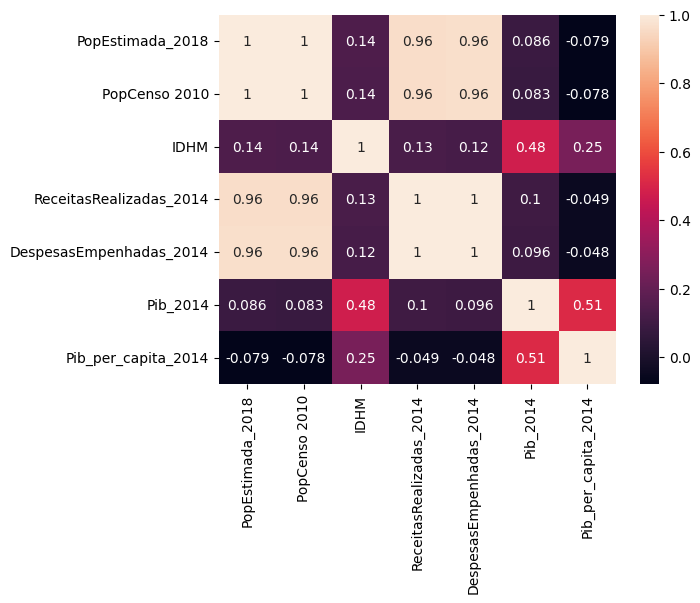

In [ ]:
# Plotando heatmap usando matriz de correlação
sns.heatmap(Numerical_data.corr(), annot=True)

### Como podemos observar graficamente o IDHM(Índice de Desenvolvimento Humano Municipal) se relaciona com o PIB de maneira não linear se aproximando de uma curva com representação próxima a uma função logarítmica, dessa forma verificamos o que o mapa de calor usando a matriz de correlação já nos havia indicado, ou seja, quando há crescimento no PIB, consequentemente também haverá crescimento no IDHM.

In [ ]:
# Plotando gráfico de dispersão
fig = px.scatter(
    Cities_Brazil,
    x='Pib_2014',
    y='IDHM',
    color='LocalCidade',
    hover_data=['Pib_2014', 'IDHM', 'LocalCidade'])

# Removendo legenda
fig.update_layout(showlegend=False)

# Exibindo gráfico
fig.show()

# Análise Preditiva de Dados

## Definindo função para treinar e avaliar modelos.

In [ ]:
def train_and_evaluate_model(filename, model_class, param_grid=None):
    # Carregando os dados
    Cities_Brazil = pd.read_excel(filename)

    # Atualizando a coluna 'População_Estimada_2024' com a taxa de crescimento anual de 0.52%
    taxa_de_crescimento_anual = 0.52 / 100
    Cities_Brazil['População_Estimada_2024'] = Cities_Brazil['PopCenso 2010'] * (1 + taxa_de_crescimento_anual) ** (2024 - 2010)

    # Criando a coluna 'Ano' baseada na presença de dados de população do censo
    Cities_Brazil['Ano'] = Cities_Brazil.apply(lambda row: 2010 if pd.notna(row['PopCenso 2010']) else 2018, axis=1)

    # Selecionando as colunas relevantes para o modelo
    X = Cities_Brazil[['PopCenso 2010', 'Ano']]
    y = Cities_Brazil['População_Estimada_2024']

    # Dividindo os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Criando e treinar o modelo
    if param_grid is not None:
        if model_class == KNeighborsRegressor:
            # Usando um pipeline para o KNeighborsRegressor com GridSearchCV
            model = GridSearchCV(make_pipeline(StandardScaler(), model_class()),
                                 {'kneighborsregressor__n_neighbors': param_grid['n_neighbors']},
                                 scoring='neg_mean_squared_error', cv=5)
        elif model_class == DecisionTreeRegressor:
            # Usando GridSearchCV diretamente no DecisionTreeRegressor sem prefixo
            model = GridSearchCV(model_class(), param_grid, scoring='neg_mean_squared_error', cv=5)
    else:
        model = model_class()

    # Treinando o modelo
    model.fit(X_train, y_train)

    # Fazendo previsões com os dados de teste
    y_pred_test = model.predict(X_test)

    # Calculando o MSE e R2 para o conjunto de teste
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    # Imprimindo os resultados
    print(f"Métricas para o modelo {model_class.__name__}:")
    print(f"Erro Quadrático Médio (MSE): {mse}")
    print(f"R2 (Coeficiente de Determinação): {r2}")
    print()

    # Retornando o modelo treinado, as métricas e o DataFrame original
    return model, {'mse': mse, 'r2': r2}, Cities_Brazil

# Definindo os grids de parâmetros para otimização
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
dt_param_grid = {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10]}

# Aplicando a função para cada modelo e armazenando os resultados
knn_model, knn_metrics, Cities_Brazil = train_and_evaluate_model('Cities_Brazil_IBGE.xlsx', KNeighborsRegressor, knn_param_grid)
dt_model, dt_metrics, Cities_Brazil = train_and_evaluate_model('Cities_Brazil_IBGE.xlsx', DecisionTreeRegressor, dt_param_grid)
lr_model, lr_metrics, Cities_Brazil = train_and_evaluate_model('Cities_Brazil_IBGE.xlsx', LinearRegression)

# Comparando as métricas e determinando o melhor modelo baseado no R2
best_model_metrics = max([knn_metrics, dt_metrics, lr_metrics], key=lambda x: x['r2'])
best_model_instance = knn_model if best_model_metrics == knn_metrics else dt_model if best_model_metrics == dt_metrics else lr_model

# Fazendo previsões para todas as linhas do DataFrame original usando o melhor modelo
# Escalando as features apenas se necessário (para KNeighborsRegressor)
if isinstance(best_model_instance, KNeighborsRegressor):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(Cities_Brazil[['PopCenso 2010', 'Ano']])
    Cities_Brazil['População_Prevista_2024'] = best_model_instance.predict(X_scaled)
else:
    Cities_Brazil['População_Prevista_2024'] = best_model_instance.predict(Cities_Brazil[['PopCenso 2010', 'Ano']])

# Calculando a distância Euclidiana entre as previsões e as estimativas diretas
Cities_Brazil['Distância_Euclidiana'] = np.sqrt((Cities_Brazil['População_Estimada_2024'] - Cities_Brazil['População_Prevista_2024']) ** 2)

# Salvando o DataFrame com as previsões do melhor modelo e a distância Euclidiana no arquivo Excel
Cities_Brazil.to_excel('Cities_Brazil_BestModelPredictions_with_Distance.xlsx', index=False)

Métricas para o modelo KNeighborsRegressor:
Erro Quadrático Médio (MSE): 90640843.71219724
R2 (Coeficiente de Determinação): 0.9923672486762578

Métricas para o modelo DecisionTreeRegressor:
Erro Quadrático Médio (MSE): 49094787.163225025
R2 (Coeficiente de Determinação): 0.9958657897878931

Métricas para o modelo LinearRegression:
Erro Quadrático Médio (MSE): 8.277508539004662e-21
R2 (Coeficiente de Determinação): 1.0



## Utilizando a função "drop" para excluir as colunas que não são numéricas e o IBGECode depois agrupamos os dados por estado.

In [ ]:
Data_States = Cities_Brazil.drop(['IBGECode', 'LocalCidade', 'LocalEstado', 'RegiaoBrasil', 'Latitude', 'Longitude', 'Gentilico'], axis = 1)

# Aplicando a função replace_comma_with_dot e trocando os tipos das coluna 'Pib_2014' e 'IDHM' para float antes do agrupamento por Estado
Data_States['Pib_2014'] = Data_States['Pib_2014'].apply(replace_comma_with_dot)
Data_States['IDHM'] = Data_States['IDHM'].apply(replace_comma_with_dot)
Data_States[['Pib_2014', 'IDHM']] = Data_States[['Pib_2014', 'IDHM']].astype(float)
Data_States = Data_States.groupby(['LocalUF']).sum()

#Resetando os indexes para aparecer a coluna 'LocalUF' novamente do DataFrame
Data_States.reset_index(inplace = True)

# Criando uma coluna com os Crescimento Populacionais Previstos entre os anos de 2010 e 2024 que recebe os valores da diferença entre a coluna 'População_Prevista_2024' e a
# a coluna 'PopCenso 2010'
Data_States['Crescimento Populacional Previsto 2010-2024'] = (Data_States['População_Prevista_2024'] - Data_States['PopCenso 2010'])

Data_States

LocalUF  PopEstimada_2018  PopCenso 2010     IDHM  ReceitasRealizadas_2014  \
0       AC            869265         733559   12.894                   532062   
1       AL           3322820        3120494   57.477                  4361246   
2       AM           4080611        3483985   35.037                  7597716   
3       AP            829494         669526   10.285                   826438   
4       BA          14812617       14016906  247.658                 26343259   
5       CE           9075649        8452381  113.460                 18125585   
6       DF           2974703        2570160    0.824                 20665448   
7       ES           3972388        3514952   53.991                  8302758   
8       GO           6921161        6003788  170.966                 14161338   
9       MA           7035055        6574789  125.032                 11590302   
10      MG          21040662       19597330  569.700                 45828696   
11      MS           2748023        2449024   53.017                  7321033   
12      MT           3441998        3035122   96.485                  5109198   
13      PA           8513497        7581051   83.161                 12374519   
14      PB           3996496        3766528  131.047                  7637746   
15      PE           9496294        8796448  110.306                 17494066   
16      PI           3264531        3110292  127.313                  6361388   
17      PR          11348937       10444526  280.082                 28769723   
18      RJ          17159960       15989929   65.220                 41386660   
19      RN           3479010        3168027  102.012                  6404696   
20      RO           1757589        1562409   33.490                  3542301   
21      RR            576568         450479    9.153                  1119322   
22      RS          11329605       10693929  353.911                 33395755   
23      SC           7075494        6248436  214.373                 18757673   
24      SE           2278308        2068017   44.770                  5002533   
25      SP          45538936       41262199  476.995                140756220   
26      TO           1555229        1383445   88.950                  3214675   

    DespesasEmpenhadas_2014     Pib_2014  População_Estimada_2024      Ano  \
0                    539674    282553.74             7.888052e+05    44220   
1                   4992385    981995.54             3.355506e+06   205020   
2                   6910609    599524.09             3.746373e+06   124620   
3                    681711    252950.94             7.199497e+05    32160   
4                  24917440   4474734.10             1.507256e+07   838170   
5                  17042936   1623648.10             9.088951e+06   369840   
6                  19008773     73971.05             2.763725e+06     2010   
7                   7466006   2153272.17             3.779672e+06   156780   
8                  13166398   5890373.85             6.455949e+06   494460   
9                  11382671   1777354.80             7.069953e+06   436170   
10                 42741453  13998220.97             2.107326e+07  1714530   
11                  6875457   2565402.83             2.633466e+06   158790   
12                  4463550   4400179.16             3.263705e+06   283410   
13                 12209109   1781551.91             8.151999e+06   289440   
14                  7083938   1973471.29             4.050195e+06   448230   
15                 16693936   1878618.63             9.458931e+06   371850   
16                  5964836   1794549.76             3.344536e+06   450240   
17                 25407484  10397427.81             1.123113e+07   801990   
18                 42717180   3149245.75             1.719417e+07   184920   
19                  6277516   1885913.03             3.406619e+06   335670   
20                  3148959    877627.33             1.680078e+06   104520   
21                

## Calculando a taxa de crescimento anual de 2010 para 2018

In [ ]:
Taxa_de_crescimento_anual_2018_2010 = (Data_States['PopEstimada_2018'][0] / Data_States['PopCenso 2010'][0]) ** (1/(2018-2010)) - 1


# Printando a taxa de crecimento anual de 2010 para 2018 em porcentagem com duas casas decimais
print(f"A Taxa de Crescimeto anual de 2010 para 2018 foi de {Taxa_de_crescimento_anual_2018_2010:.2%}")

A Taxa de Crescimeto anual de 2010 para 2018 foi de 2.14%


### Como a taxa de crescimento anual entre a variável 'PopEstimada_2018'(que é uma variável que já veio no dataset que estamos usando) e a variável 'PopCenso_2010' é de 2.14%, os valores dessa variável serão maiores que os da variável 'População_Prevista_2024' que é a variável que recebe os valores previstos da popupalação que foram calculados numa célula de código acima e tem a taxa de crescimento anual de 0.52% (que é a média observada nos censos do IBGE entre os anos de 2010 e 2022).

In [ ]:
# Calculando a taxa de crescimento anual de 2010 para 2024
Taxa_de_crescimento_anual_2024_2010 = (Data_States['População_Prevista_2024'][0] / Data_States['PopCenso 2010'][0]) ** (1/(2024-2010)) - 1


# Printando a taxa de crecimento anual de 2010 para 2024 em porcentagem com duas casas decimais
print(f"A Taxa de Crescimeto anual de 2010 para 2024 foi de {Taxa_de_crescimento_anual_2024_2010:.2%}")

A Taxa de Crescimeto anual de 2010 para 2024 foi de 0.52%


### Finalizamos a análise com um gráfico do crescimento previsto de 2010 para 2024, ele tem o intuito apenas de constatar que pelo que vimos anteriormente, os estados de São Paulo Minas Gerais e Rio de Janeiro continuam sendo os estados com maiores crecimentos populacionais comparando-os com os crescimentos populacionais estimados de 2010 e 2014.

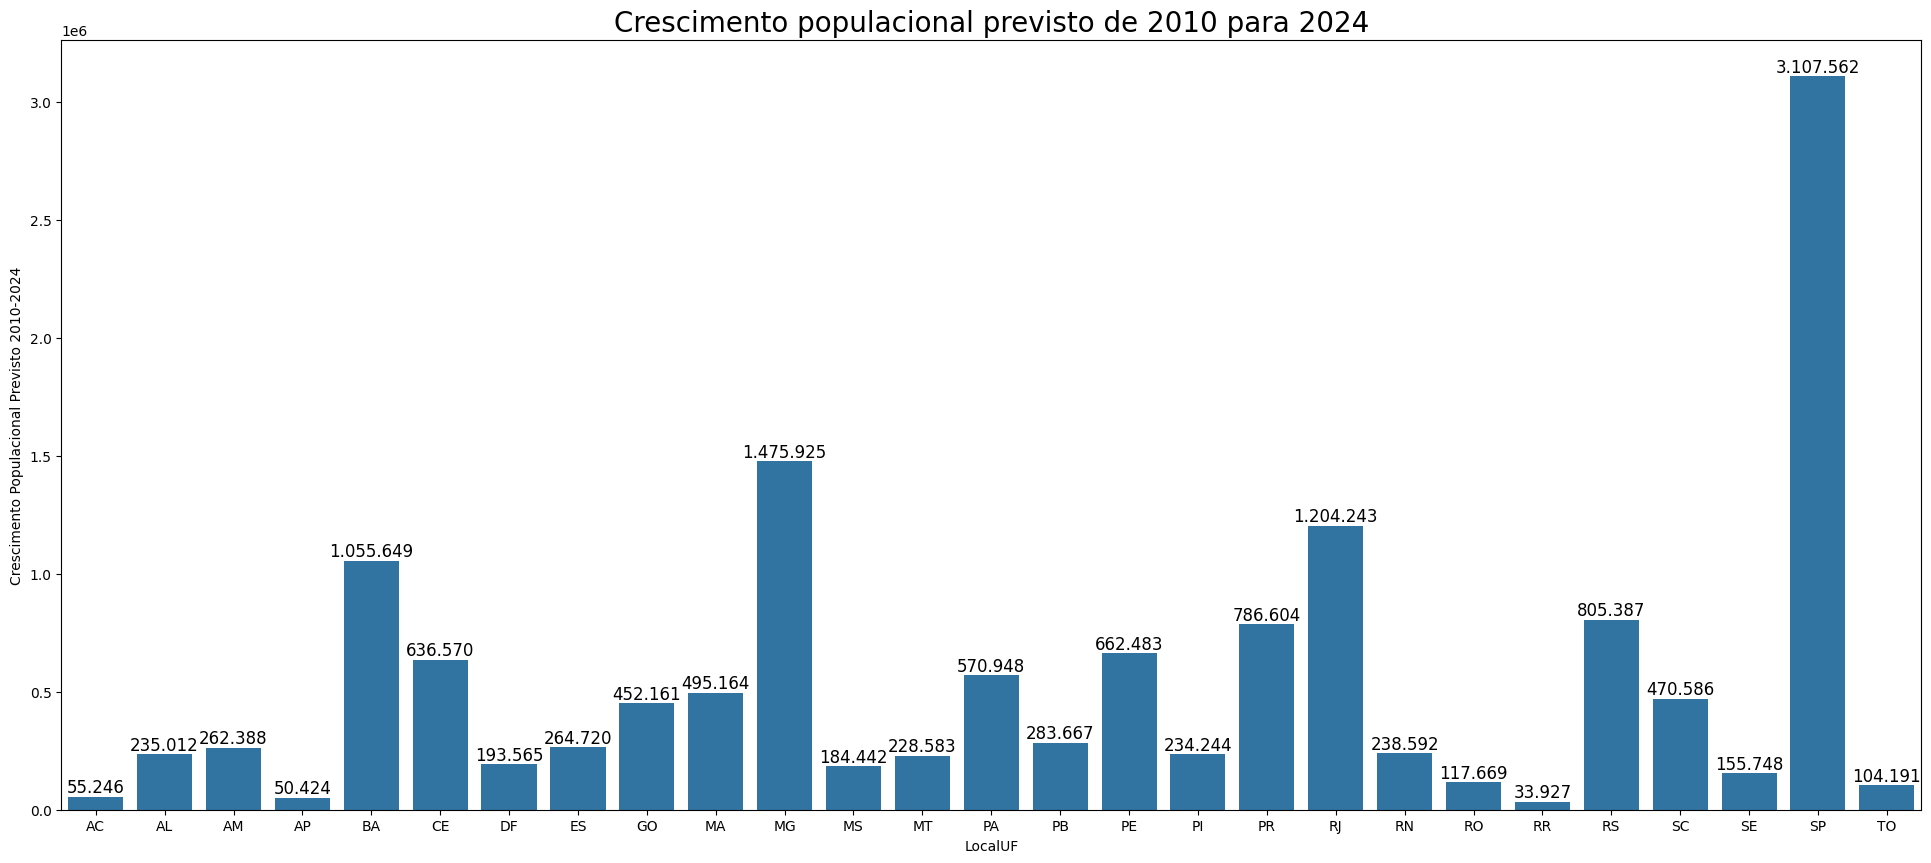

In [ ]:
# Definindo o tamanho do gráfico como '24, 10' (24 é o comprimento e 10 a altura)
plt.figure(figsize=(24, 10))

# Atribuindo o gráfico a variável "ax" e o plotando o com os parâmetros Dataset, x = "LocalUF" e  y = "Crescimento Populacional Previsto 2010-2024"
ax = sns.barplot(Data_States, x="LocalUF", y="Crescimento Populacional Previsto 2010-2024")

# Definindo os rótulos atribuidos as barras do gráfico, formatando-os para que a cada 3 casas seja adicionado um ponto
ax.bar_label(ax.containers[0], fmt='{:,.0f}'.format, labels=[f'{x:,.0f}'.replace(',', '.') for x in ax.containers[0].datavalues], fontsize=12)

# Adicionando título ao gráfico e definindo o tamanho da fonte como 20
ax.set_title("Crescimento populacional previsto de 2010 para 2024", fontsize=20)

# Exibindo o gráfico
plt.show()

# Conclusão:

###